#  📖👨🏻‍💻 Projeto de Ingresso - Processamento de Linguagem Natural 👨🏻‍💻📖

Olá, programadore, seja bem-vinde a este notebook que trabalha o dataset sobre review de videogames da Amazon! A intenção deste é proporcionar uma visão sobre conceitos importantes na área de Processamento de Linguagem Natural, haja vista que sua construção se dá com o intuito do meu ingresso na área com mesmo nome do Turing USP, grupo da Universidade de São Paulo que visa disseminar, aplicar e estudar Inteligência Artificial. 🥰

No que diz respeito ao dataset aqui utilizado, mais informações podem ser encontradas [aqui](https://jmcauley.ucsd.edu/data/amazon/).

Caso deseje entender um pouco mais sobre os assuntos abordados, ou sobre outros ramos de IA, recomendo que busque informações no Turing Talks, blog de informações relacionadas à IA do Turing USP: [Turing Talks](https://medium.com/turing-talks).


Para começar nosso notebook, fiz sua divisão nas etapas a seguir:

**SUMÁRIO**:

1. Importações;
2. Observações iniciais;
3. Limpeza de dados;
4. Pré-processamento;
5. Análise do Corpus;
6. Modelagem e Feature Engineering;
7. Embeddings;
8. Conclusão.


As informações do dataset podem ser vistas a seguir:

**INFORMAÇÕES DO DATASET:**

* **reviewerID** - ID do avaliador;
* **asin** - ID do produto;
* **reviewerName** - nome do avaliador;
* **helpful** - classificação de utilidade da review;
* **reviewText** - texto da review;
* **overall** - classificação do produto;
* **summary** - resumo da review
* **unixReviewTime** - tempo da review (unix time);
* **reviewTime** - tempo da review (raw).

# 1. Importações ✈️

Primeiramente, vamos fazer todas as importações que serão necessárias ao longo do código:

In [ ]:
#para operações básicas
import pandas as pd
import numpy as np

#para visualização
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import os
from PIL import Image

#para trabalhar com texto
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk import bigrams
from nltk import trigrams
import spacy
import re

#para contagens
from collections import Counter

#para os modelos de predição
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#para as métricas
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

#para os embeddings
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

Em seguida, importaremos os datasets, que já nos foram proporcionados após sua divisão em treino, teste e validação:

In [ ]:
df_train = pd.read_csv('video_games_reviews_train.csv')
df_test = pd.read_csv('video_games_reviews_test.csv')
df_dev = pd.read_csv('video_games_reviews_dev.csv')

# 2 Observações iniciais 👀

Como todos possuem as mesmas features, podemos olhar a carinha do nosso dataset de treino:

In [ ]:
df_train.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013"
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011"
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013"
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013"
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011"


In [ ]:
df_test.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Dataset
0,12154,25980,A16416X67B4ZKJ,B00005V6BB,"""mcfly70""","[1, 1]","MOH was good and all, but when you reach the c...",4,MOH: THE ACTUAL WAR WAS BETTER THE 3RD MCFLY R...,1035158400,"10 21, 2002",test
1,7333,215010,A2Q2ADX9C9I5WZ,B00AZWE7ES,MCRC,"[0, 4]",I am so glad I only paid $15 for this game dur...,2,15 fps? really?,1399334400,"05 6, 2014",test
2,6703,188851,A30IXQWBRD3GU9,B0053BCO00,Jerry,"[0, 0]",Forget this mario kart get mario kart ds or th...,3,ehhhh,1373414400,"07 10, 2013",test
3,5649,93541,A1S7NYZF69KYAP,B000VRCNLG,Peanut Pedro,"[0, 1]",When I purchased this game from Amazon I certa...,1,Defective Disk/Great Seller,1348963200,"09 30, 2012",test
4,2955,24169,A2MPAOYEC1KWEI,B00005R5PO,Mali,"[0, 0]",I love platform games but not many are out the...,4,It's not Spyro...,1073260800,"01 5, 2004",test


Em seguida, podemos ver as informações de todos:

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         8000 non-null   int64 
 1   index           8000 non-null   int64 
 2   reviewerID      8000 non-null   object
 3   asin            8000 non-null   object
 4   reviewerName    7916 non-null   object
 5   helpful         8000 non-null   object
 6   reviewText      7999 non-null   object
 7   overall         8000 non-null   int64 
 8   summary         8000 non-null   object
 9   unixReviewTime  8000 non-null   int64 
 10  reviewTime      8000 non-null   object
dtypes: int64(4), object(7)
memory usage: 687.6+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         2500 non-null   int64 
 1   index           2500 non-null   int64 
 2   reviewerID      2500 non-null   object
 3   asin            2500 non-null   object
 4   reviewerName    2471 non-null   object
 5   helpful         2500 non-null   object
 6   reviewText      2499 non-null   object
 7   overall         2500 non-null   int64 
 8   summary         2500 non-null   object
 9   unixReviewTime  2500 non-null   int64 
 10  reviewTime      2500 non-null   object
dtypes: int64(4), object(7)
memory usage: 215.0+ KB


In [ ]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         2000 non-null   int64 
 1   index           2000 non-null   int64 
 2   reviewerID      2000 non-null   object
 3   asin            2000 non-null   object
 4   reviewerName    1970 non-null   object
 5   helpful         2000 non-null   object
 6   reviewText      2000 non-null   object
 7   overall         2000 non-null   int64 
 8   summary         2000 non-null   object
 9   unixReviewTime  2000 non-null   int64 
 10  reviewTime      2000 non-null   object
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


Percebemos que todos possuem dados faltantes, que deverão ser limpos. 
No que diz respeito à distribuição dos dados, há tanto dados numéricos quanto categóricos. Para as análises de texto, utilizaremos, claro, os categóricos.


# 3. Limpeza de dados 🧹

Para facilitar nosso trabalho e fazermos análises reais no que diz respeito a todos os dados, por agora, juntaremos todos os datasets (mas CALMA, pois separaremos eles na hora necessária rsrsrs). Para isso, podemos criar uma feature auxiliar para que consigamos separá-los com facilidade quando necessário:

In [ ]:
df_train['Dataset'] = 'train'
df_test['Dataset'] = 'test'
df_dev['Dataset'] = 'dev'

Agora iremos juntá-los:

In [ ]:
df = pd.merge(df_train, df_test, how = 'outer')
df = pd.merge(df, df_dev, how = 'outer')

Em seguida, retiraremos os dados faltantes, já que são poucos e, em seguida, resetaremos o índice para o dataset ficar bonitinho :)

In [ ]:
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)

Agora vamos ver a carinha do bonito e suas informações:

In [ ]:
df.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Dataset
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013",train
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011",train
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013",train
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013",train
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011",train


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         12355 non-null  int64 
 1   index           12355 non-null  int64 
 2   reviewerID      12355 non-null  object
 3   asin            12355 non-null  object
 4   reviewerName    12355 non-null  object
 5   helpful         12355 non-null  object
 6   reviewText      12355 non-null  object
 7   overall         12355 non-null  int64 
 8   summary         12355 non-null  object
 9   unixReviewTime  12355 non-null  int64 
 10  reviewTime      12355 non-null  object
 11  Dataset         12355 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


Fofo, não? Acontece que agora temos que trabalhar com o nosso texto, já que nossa máquina não pensa igual nós (só consegue interpretar números...), mas falamos mais disso na próxima parte!

# 4. Pré-processamento 🔡

Para que possamos converter nosso texto para uma linguagem que a máquina entenda, precisamos, primeiramente, dar uma limpadinha maior nos nossos dados categóricos, já que devemos passar aos nossos modelos **APENAS** as informações relevantes. Assim, garantimos que ele se esforce só para o necessário e ignore o que não faz diferença, o que vai aumentar nossas métricas :) 

## 4.1 Remoção de pontuação

A primeira coisa que retiraremos são as pontuações. 

Para isso, primeiramente, criaremos uma coluna em que ficarão os dados pré-processados:

In [ ]:
df['reviewTextclean'] = df['reviewText'].copy(deep = True)

In [ ]:
df['reviewTextclean'] = df['reviewTextclean'].astype(str) #convertendo o tipo da coluna para string, já que podem existir números aí dentro

Agora, definiremos e aplicaremos a função para removermos a pontuação. Para isso, utilizaremos as Expressões Regulares: 

In [ ]:
def remove_ponctuation(text):  
  text = re.sub(r'[^\w\s]', '', text)
  return text

In [ ]:
df['reviewTextclean'] = df.reviewTextclean.apply(remove_ponctuation)

## 4.2 Tokenização

Nosso próximo passo é "quebrar" o nosso texto para que os modelos consigam trabalhar. Podemos quebrar em sentenças, palavras... mas aqui optaremos por palavras. Essa operação chama-se tokenização e, como resultado (se prepare pro choque rs), ela produz os TOKENS. 

Antes, deixaremos tudo em letra minúscula, já que o Python diferencia letras maiúsculas de minúsuculas (e sabemos que, lexicalmente, isso não muda NADA rs):

In [ ]:
df['reviewTextclean'] = df['reviewTextclean'].str.lower()

In [ ]:
df['reviewTextclean'] = df['reviewTextclean'].apply(word_tokenize) 

Vamos então dar uma olhada no resultado da tokenização:

In [ ]:
df['reviewTextclean'] 

0        [ive, got, to, play, this, on, both, consoles,...
1        [this, game, gives, you, a, series, of, word, ...
2        [you, should, pretty, much, already, know, wha...
3        [i, really, like, this, game, i, love, all, th...
4        [please, read, the, 12911, update, below, this...
                               ...                        
12350    [if, you, like, any, mario, or, cartoonish, ad...
12351    [i, have, a, xbox, 360, and, i, can, not, tell...
12352    [first, of, all, i, purchased, this, game, aft...
12353    [im, just, coming, to, this, game, in, my, que...
12354    [graphics, are, decent, they, look, like, regu...
Name: reviewTextclean, Length: 12355, dtype: object

## 4.3 Remoção de stopwords

Nossa próxima tarefa é remover as stopwords, ou palavras vazias, que não carregam nenhum significado relevante em si, já que são ou auxiliares ou estão muito frequentes no nosso texto. 

Importaremos as stopwords do inglês, já que essa é a língua do nosso dataset (e daremos uma olhadinha nelas depois):

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Acontece que, como já tiramos as pontuações do nosso texto, não faz sentido procurar, por exemplo, a stopword "she's", já que ela está com uma aspa simples. Devido a isso, primeiramente, removeremos as aspas simples das próprias stopwords:

In [ ]:
stopwords = ' '.join(stopwords).replace("'","").split()

Agora definiremos e aplicaremos nossa função para remover as stopwords finalmente:

In [ ]:
def remove_stopwords(text):
    return [item for item in text if item not in stopwords]

In [ ]:
df['reviewTextclean'] = df.reviewTextclean.apply(remove_stopwords)

Podemos também ver nosso resultado final já sem as stopwords:

In [ ]:
df['reviewTextclean']

0        [ive, got, play, consoles, honestly, say, look...
1        [game, gives, series, word, puzzles, figure, b...
2        [pretty, much, already, know, game, reading, r...
3        [really, like, game, love, challenges, love, d...
4        [please, read, 12911, update, article, ps3, us...
                               ...                        
12350    [like, mario, cartoonish, adventure, game, def...
12351    [xbox, 360, tell, many, times, sent, repair, e...
12352    [first, purchased, game, price, dropped, readi...
12353    [im, coming, game, queue, 2011, indeed, pretty...
12354    [graphics, decent, look, like, regular, xbox, ...
Name: reviewTextclean, Length: 12355, dtype: object

## 4.4 Stemização

Acontece que, mesmo assim, o modelo ainda acaba diferenciando, por exemplo, várias palavras que, lexicalmente, são semelhantes. Por exemplo, o verbo "cheguei" seria diferenciado de "chegarei", mas sabemos que isso pode não ser uma distinção tão relevante para o nosso modelo. 

Devido a isso, devemos reduzir ainda mais o vocabulário, e a primeira estratégia que podemos utilizar é a **Stemização**. Ela "trunca" a raíz da palavra e remove o restante. Para isso, utilizaremos dois "stemmers" diferentes aqui, que são os bonitinhos que realizam esse processo :) 

Podemos comparar o trabalho deles depois.

In [ ]:
ps = PorterStemmer()

In [ ]:
lancaster = LancasterStemmer()

In [ ]:
def stemming_ps(text):
    return [ps.stem(y) for y in text] #a biblioteca utilizada aqui e na outra stemização é a NLTK

In [ ]:
df['stemmed_ps'] = df['reviewTextclean'].apply(stemming_ps)

In [ ]:
def stemming_lancaster(text):
    return [lancaster.stem(y) for y in text] 

In [ ]:
df['stemmed_lancaster'] = df['reviewTextclean'].apply(stemming_lancaster)

In [ ]:
df.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Dataset,reviewTextclean,stemmed_ps,stemmed_lancaster
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013",train,"[ive, got, play, consoles, honestly, say, look...","[ive, got, play, consol, honestli, say, look, ...","[iv, got, play, consol, honest, say, look, 100..."
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011",train,"[game, gives, series, word, puzzles, figure, b...","[game, give, seri, word, puzzl, figur, bought,...","[gam, giv, sery, word, puzzl, fig, bought, fan..."
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013",train,"[pretty, much, already, know, game, reading, r...","[pretti, much, alreadi, know, game, read, revi...","[pretty, much, already, know, gam, read, revie..."
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013",train,"[really, like, game, love, challenges, love, d...","[realli, like, game, love, challeng, love, dif...","[real, lik, gam, lov, challeng, lov, diff, pla..."
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011",train,"[please, read, 12911, update, article, ps3, us...","[pleas, read, 12911, updat, articl, ps3, users...","[pleas, read, 12911, upd, artic, ps3, usersbad..."


Vemos, então, que o Lancaster se comportou como um stemmer um pouco mais "agressivo", digamos assim. 

No entanto, eu optei por não utilizar os stems (resultados da stemização) para a construção do modelo, mas sim os lemmas, que veremos na próxima parte, então apagarei essas features stemizadas do nosso dataset só pra não ficar uma bagunça depois :)

In [ ]:
df.drop(columns = ['stemmed_lancaster', 'stemmed_ps'], inplace = True)

## 4.5 Lemmatização

Outra estratégia que podemos utilizar para reduzir o vocabulário do nosso corpus é a **Lemmatização**. Ela visa reduzir a palavra à sua forma original. 

Por exemplo, os verbos "cheguei" e "chegarei" seriam reduzidos a "chegar". Aqui também utilizaremos a NLTK para fazer esse processo:

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [ ]:
df['reviewTextclean'] = df.reviewTextclean.apply(lemmatize_text)

## 4.6 Resumo do Pré-processamento

E esse foi a mastigadinha vegana que demos no nosso corpus, vulgo o pré-processamento :)

Podemos, por fim, definir uma função que reuna todas as etapas aplicadas para que, caso haja novas entradas, apliquemos apenas uma função e já tenhamos o resultado final! 

In [ ]:
def pre_processing(text):
  remove_ponctuation(text)
  text = text.str.lower()
  text = text.apply(word_tokenize)
  text = text.apply(remove_stopwords)
  text = text.apply(lemmatize_text) #optando por fazer a lemmatização ao invés da stemização

# 5. Análise do Corpus 📊

Com o texto pré-procesado, podemos fazer algumas análises em cima do nosso corpus, para que possamos entender melhor os dados. 

## 5.1 Frequência de Termos

Podemos, primeiramente, ver quais os termos que mais são frequentes no nosso corpus (claro, sem ser as stopwords, que já foram removidas).

Para isso, precisaremos, primeiro, criar uma lista com todos os termos do nosso corpus:

In [ ]:
lemmas = []

In [ ]:
def lemma(df_series, lista):
 for sentence in df_series:
  for word in sentence:
    lista.append(word) 

In [ ]:
lemma(df['reviewTextclean'], lemmas)

Agora veremos a frequência dos termos mais comuns:

In [ ]:
frequency = nltk.FreqDist(lemmas)

In [ ]:
frequency.most_common()[:20]

[('game', 54558),
 ('like', 12836),
 ('get', 10974),
 ('one', 10964),
 ('time', 8906),
 ('play', 8893),
 ('really', 7057),
 ('good', 6859),
 ('even', 6135),
 ('would', 6006),
 ('fun', 5991),
 ('much', 5909),
 ('make', 5773),
 ('first', 5378),
 ('character', 5298),
 ('great', 5284),
 ('thing', 5098),
 ('also', 4856),
 ('way', 4566),
 ('graphic', 4533)]

É mais bonitinho a gente colocar num gráfico, não? rs 

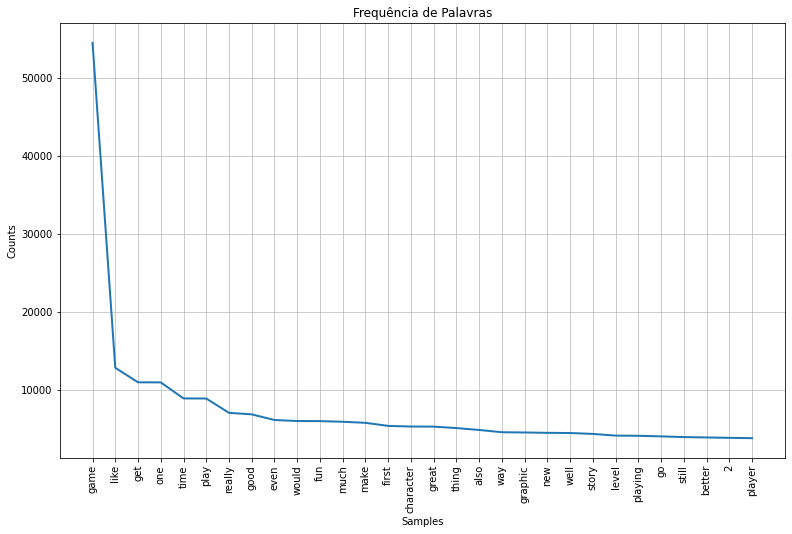

<AxesSubplot:title={'center':'Frequência de Palavras'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize = (13, 8))
frequency.plot(30, title = "Frequência de Palavras")

Eita, a palavra "game" aparece MUITO no nosso corpus, então possivelmente ela não indique muita coisa para os nossos modelos :c Ela funciona como uma stopword personalizada a esse dataset. 

Temos que dar uma investigada mais a fundo em alguns outros termos frequentes também, como "like", "get" e "one".

Antes disso, devemos dar uma alteradinha em uma feature do nosso dataset: a classificação da avaliação. Na proposta do Projeto, foi dito que análises acima de 3 eram consideradas positivas, enquanto as demais eram negativas, portanto criaremos uma coluna binária com esses valores.

Em seguida, podemos ver se a frequência das palavras justamente se difere em análises positivas e negativas:

In [ ]:
df['overall_binary'] = df['overall'].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
lemma_good = []
lemma_bad = []

In [ ]:
bad_reviews = df[df['overall_binary'] == 0]['reviewTextclean'].reset_index(drop = True)
good_reviews = df[df['overall_binary'] == 1]['reviewTextclean'].reset_index(drop = True)

In [ ]:
lemma(bad_reviews, lemma_bad)

In [ ]:
lemma(good_reviews, lemma_good)

In [ ]:
frequency_bad = nltk.FreqDist(lemma_bad)
frequency_good = nltk.FreqDist(lemma_good)

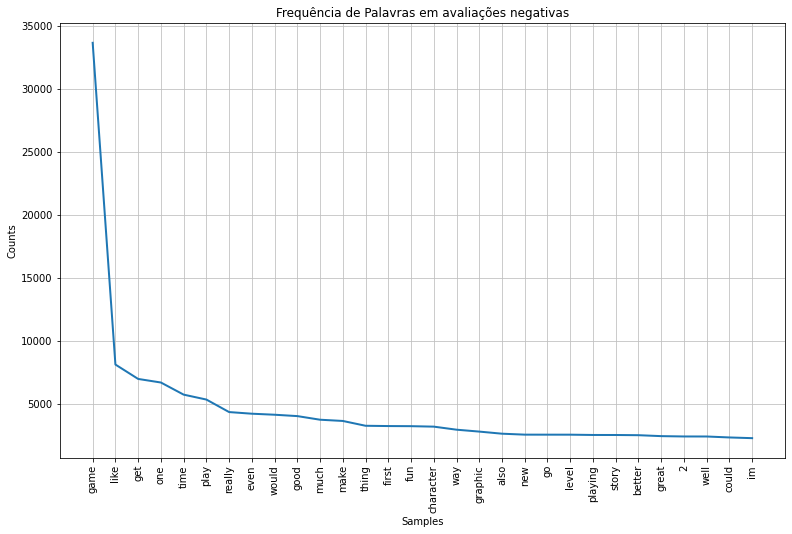

<AxesSubplot:title={'center':'Frequência de Palavras em avaliações negativas'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize = (13, 8))
frequency_bad.plot(30, title = 'Frequência de Palavras em avaliações negativas')

Nas reviews negativas, acontece a mesma coisa que aconteceu no gráfico geral com "game", "like", "get" e "one".

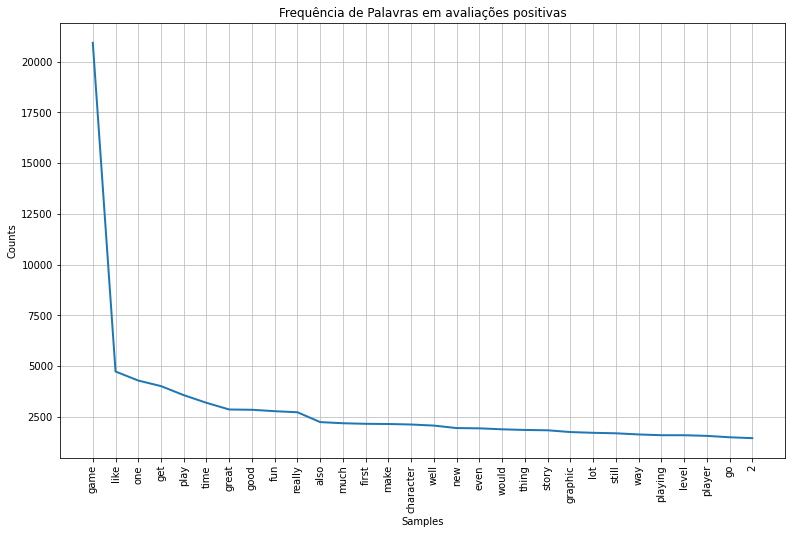

<AxesSubplot:title={'center':'Frequência de Palavras em avaliações positivas'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize = (13, 8))
frequency_good.plot(30, title = 'Frequência de Palavras em avaliações positivas')

Percemos, aqui, que, diferentemente das reviews negativas, "one" aparece mais do que "get". De resto, continua igual as outras preocupações que tivemos... 

No entanto, é legal ressaltar que aparecem com mais frequência algumas palavras importantes como "good", "fun" e "much".

Para analisarmos melhor as palavras em questão, criaremos uma feature no nosso dataset com o texto sem estar tokenizado, ou seja, como apenas uma string.

Em seguida, dividiremos a string para que possamos ver a concordância das palavras, isto é, em que contexto elas aparecem:

In [ ]:
df['reviewText_str'] = np.nan

In [ ]:
df['reviewText_str'] = df['reviewTextclean'].apply(' '.join)

In [ ]:
texto = nltk.Text(' '.join(df['reviewText_str']).split())

In [ ]:
texto.concordance('game')

Displaying 25 of 54558 matches:
ps4 maybe xbox one messed ps4 killed game give series word puzzle figure bough
rd puzzle figure bought fan scrabble game cant compete fine occasional game si
le game cant compete fine occasional game simply miss boat come playing fun pr
playing fun pretty much already know game reading review buying used careful s
ince gamecube disc notorious riddled game destroying error really like game lo
ed game destroying error really like game love challenge love different place 
ade commission protecting consumersa game came gamebreaking bug prevent user f
box internet connection required get game work properly first place talking pa
mer marveled former graphical beauty game installing latest patch read thread 
read www bethesdas forum know poorly game performs negatively affect ps3 hardw
stf vast complexity production value game excuse glitch undermine overall gami
 platform talking minor quest glitch game stutter complete halt becomes unplay
railblazing term com

In [ ]:
texto.concordance('like')

Displaying 25 of 12836 matches:
riddled game destroying error really like game love challenge love different p
ge paid 6000 im bethesdas payroll id like able play game instead feeling like 
 like able play game instead feeling like got robbed lied update 12911 patch 1
ate beginning though 34wow game look like really cool34 timeline splitting sto
remise game completely awesome least like time travel stuff however narrative 
ke much expensive mistake still sort like would willing bet one come price rat
en enjoy slower paced game sometimes like deblob game near captivating buy don
ame near captivating buy donkey kong like jump around squash thing much better
little distractionwith onto badwhile like croft manor inability replay level r
level begin show terrible werei felt like game nothing assault course lara go 
insult injury level far short coming like exploring every nook cranny every le
re first conquer puzzle get main bos like anniversarylara look great wear fall
t injury showing cle

In [ ]:
texto.concordance('get')

Displaying 25 of 10974 matches:
etailbox internet connection required get game work properly first place talkin
sing product socalled special edition get released consumer every right demand 
das advice ps3 user among many others get faster harddrive never dispose item o
 row wait take 30 second complete let get straight player supposed sit press se
ing system high price sold store wait get one probably cheaper store price seco
sted placing something pressure plate get something open simply finding lever p
eded game tomb raider james bond even get started wearing level level go labrat
e last level needed confront main bos get explore first conquer puzzle get main
 bos get explore first conquer puzzle get main bos like anniversarylara look gr
 game game average fun day mainly got get controller control rough game least a
 thing really changed graphic edition get ton new weapon upgrade certain vendor
ew weapon upgrade certain vendor even get upgrade ship adding shield gun mod ma
ertainme

In [ ]:
texto.concordance('one')

Displaying 25 of 10964 matches:
ay look 100000x better ps4 maybe xbox one messed ps4 killed game give series wo
mechanic mildly interesting character one two good weapon premise game complete
ake still sort like would willing bet one come price rather quickly wait compar
h thing much better game disappointed one christmas gift poor nothing go bought
system high price sold store wait get one probably cheaper store price second h
 good amount damage react fast enough one easy challenge thus funthe level obvi
gination put puzzle disappointed many one level begin show terrible werei felt 
ntroller sell unlike many game sequel one improved thing really changed graphic
several mini game within main gamethe one thing like game cant move forward ont
 allow aim much precisionxiii lengthy one player mode 12 level connected good s
n jungle storm support 16 playersxiii one best fps market version better exclus
er online voice chat gamecube version one splitscreen multiplayeroverall xiii m
recommen

Bom... Teremos que dizer adeus a essas queridas, já que não dizem muito aos nossos modelos. Para isso, juntaremos ela às stopwords do NLTK e, em seguida, aplicaremos nossa função de remover stopwords novamente.

Por fim, redefiniremos a coluna sem estar tokenizada, para que ela também não tenha essas palavras.

In [ ]:
stopwords_add = ['game', 'like', 'get', 'one']

In [ ]:
stopwords = stopwords + stopwords_add

In [ ]:
df['reviewTextclean'] = df.reviewTextclean.apply(remove_stopwords)

In [ ]:
df['reviewText_str'] = df['reviewTextclean'].apply(' '.join)

## 5.2 Vocabulário

Outra questão que podemos ver no nosso texto é o nosso vocabulário, ou seja, a quantidade de palavras que existem:

In [ ]:
len(' '.join(df['reviewText']).split())

2735848

Percebemos, então, que o texto possui 2735848 palavras, o que pode parecer muito. No entanto, um evento que ocorre frequentemente é a repetição dos termos, principalmente já que, como tiramos essa informação da coluna de texto original, sem estar pré-processada (já que queremos tirar a informação do vocabulário do texto original), ainda existem as stopwords, que repetem frequentemente. 

Devido a isso, podemos calcular a "diversidade lexical" do nosso texto, que vê a porcentagem de palavras diferentes que ocorrem no texto:

In [ ]:
def lexical_diversity(texto):
  return len(set(texto)) / len(texto)

In [ ]:
lexico_original = lexical_diversity(' '.join(df['reviewText']).split())

Podemos, para comparar, fazer a diversidade lexical também do texto pré-processado e, em seguida, colocarmos em um gráfico para ficar bonitinho :)

In [ ]:
lexico_preprocess = lexical_diversity(' '.join(df['reviewText_str']).split())

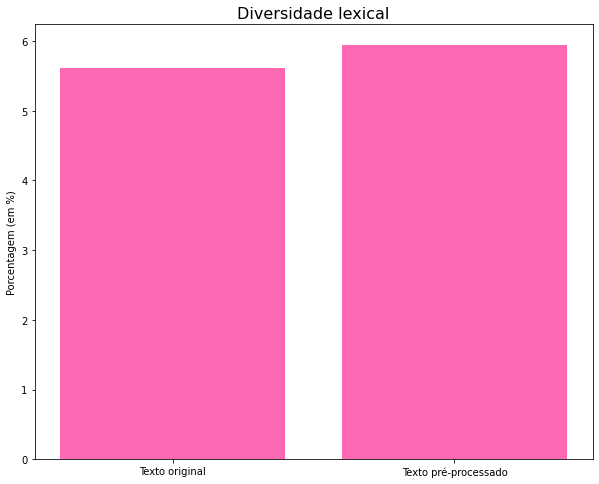

In [ ]:
plt.figure(figsize = (10,8))
plt.bar(['Texto original', 'Texto pré-processado'], [lexico_original*100, lexico_preprocess*100], color = 'hotpink')
plt.title('Diversidade lexical', fontsize = 16)
plt.ylabel('Porcentagem (em %)')
plt.show()

Percebemos, então, que a quantidade de palavras únicas é relativamente pequena quando em comparação ao número total de palavras.

Vale ressaltar, também, que o texto pré-processado apresenta uma ligeira porcentagem de diversidade lexical maior do que o texto original, haja vista que foram removidas as stopwords, que costumam repetir muito. 

## 5.3 WordClouds

Uma forma mais bonitinha de vermos o nosso corpus e a frequência de suas palavras é pela querida nuvem de palavras, então vamos ver algumas :)

In [ ]:
def WordNuvem(df_series, arquivo,review): 
    text = df_series.sum()

    d = os.path.dirname(__file__) if '__file__' in locals() else os.getcwd()

    shape = np.array(Image.open(os.path.join(d, arquivo)))

    image_colors = ImageColorGenerator(shape)

    wc = WordCloud(background_color = 'white', width = 800, height = 500, max_words = 600, mask = shape, font_path = 'Minecraft_Russian_By_Nexon.ttf').generate(text).recolor(color_func=image_colors)
    plt.figure(figsize = (12,10))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f'Reviews {review}', fontsize = 22)
    plt.show()

Podemos ver, primeiramente, uma para todas as reviews:

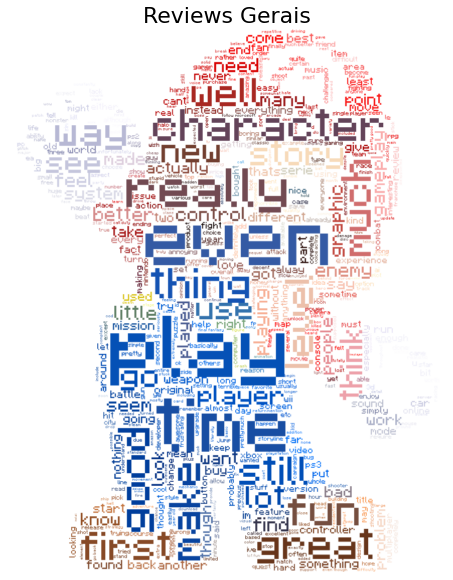

In [ ]:
WordNuvem(df['reviewText_str'], 'mario.jpg', 'Gerais')

Percebemos que muitas palavras relativas a jogos são dominantes, como "play" ou "character", mas muitas relativas à avaliações também são frequentes, como "really", "well", "fun" e "great".

Em seguida, veremos uma para as reviews positivas e outra para as reviews negativas para compararmos:

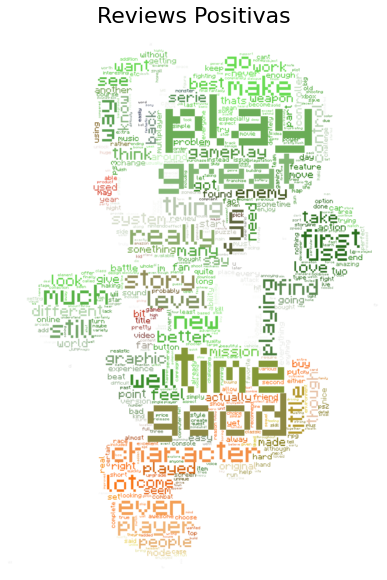

In [ ]:
WordNuvem(df[df['overall_binary'] == 1]['reviewText_str'], 'yoshi.jpg', 'Positivas')

Novamente, repetem-se palavras relativas a jogos, mas o foco é em palavras que refletem a positividade das reviews, como "good" e "great".

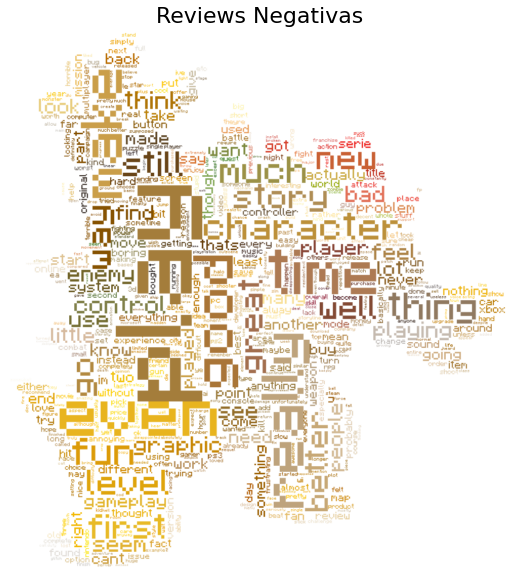

In [ ]:
WordNuvem(df[df['overall_binary'] == 0]['reviewText_str'], 'bowser.jpg', 'Negativas')

Por mais que sejam reviews negativas, é interessante notar como palavras como "good" e "great" ainda se apresentam de forma dominante. Podemos, talvez, ver isso em avaliações em que o avaliador esperasse que algo fosse bom, ou em avaliações nas quais ele elogiou algo para, posteriormente, criticar outro ponto.

## 5.4 N-gramas

Nossa próxima análise é relativa aos n-gramas, ou seja, às palavrinhas que aparecem juntas, digamos assim rsrs

Aqui, trabalharemos com bigramas e trigramas, ou seja, o conjunto de 2 palavras e 3 palavras que aparecem juntos, respectivamente. 

In [ ]:
bigramas = []
trigramas = []

In [ ]:
def ngrams(lista, ngram, size):
  for i in df.index:
    if len(df['reviewTextclean'][i]) > size:
      lista.append([item for item in ngram(df['reviewTextclean'][i])])
    else:
      lista.append([])

In [ ]:
ngrams(bigramas, bigrams,2)

In [ ]:
ngrams(trigramas,trigrams,3)

Para que o conceito de n-gramas fique mais claro, podemos dar uma olhada em um exemplo de cada: 

In [ ]:
bigramas[0]

[('ive', 'got'),
 ('got', 'play'),
 ('play', 'console'),
 ('console', 'honestly'),
 ('honestly', 'say'),
 ('say', 'look'),
 ('look', '100000x'),
 ('100000x', 'better'),
 ('better', 'ps4'),
 ('ps4', 'maybe'),
 ('maybe', 'xbox'),
 ('xbox', 'messed'),
 ('messed', 'ps4'),
 ('ps4', 'killed')]

In [ ]:
trigramas[0]

[('ive', 'got', 'play'),
 ('got', 'play', 'console'),
 ('play', 'console', 'honestly'),
 ('console', 'honestly', 'say'),
 ('honestly', 'say', 'look'),
 ('say', 'look', '100000x'),
 ('look', '100000x', 'better'),
 ('100000x', 'better', 'ps4'),
 ('better', 'ps4', 'maybe'),
 ('ps4', 'maybe', 'xbox'),
 ('maybe', 'xbox', 'messed'),
 ('xbox', 'messed', 'ps4'),
 ('messed', 'ps4', 'killed')]

No entanto, para uma análise legal, podemos ver quais bigramas e trigramas são mais frequentes.

Para isso, primeiramente, criaremos uma lista com todos os n-gramas (claro, separando uma para bigramas e outra para trigramas), para, posteriormente, criarmos uma Panda series com os valores em ordem decrescente, já que queremos apenas os mais frequentes.

Faremos isso, inicialmente, com os bigramas:

In [ ]:
bigrams_list = []
for sentence in bigramas:
  for bigrama in sentence:
    bigrams_list.append(bigrama)

In [ ]:
bigrams_series = (pd.Series(bigrams_list).value_counts())

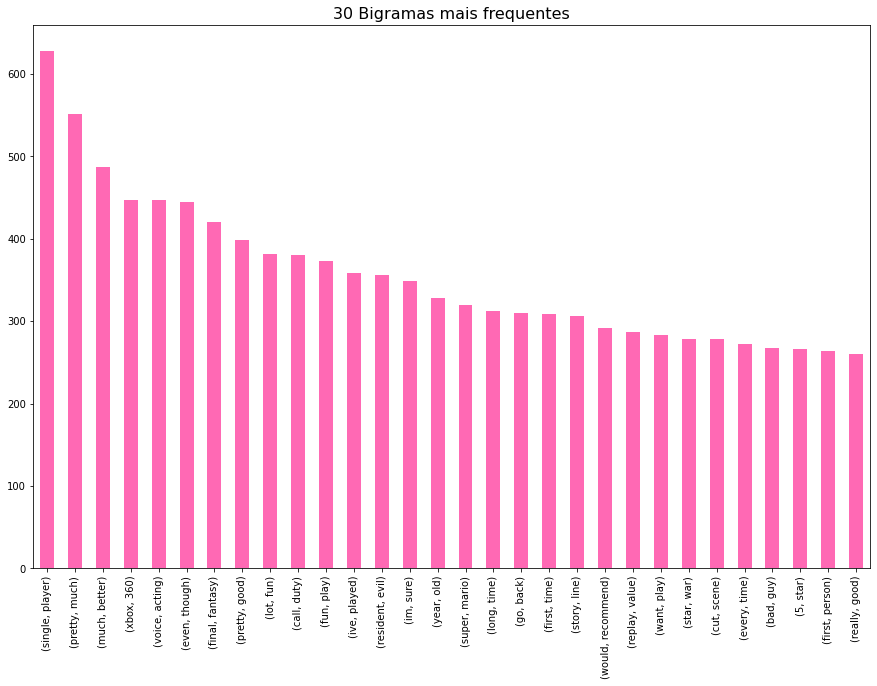

In [ ]:
bigrams_series[:30].plot.bar(figsize=(15,10), color = 'hotpink')
plt.title('30 Bigramas mais frequentes', fontsize = 16)
plt.show()

Percebemos que os bigramas mais frequentes são palavras que, dado o contexto do nosso corpus, já costumam a aparecer juntas, como "single player", para se referir a determinado tipo de jogos, ou "pretty much" para avaliações. Alguns nomes compostos também se encaixam aqui, como "xbox 360", "final fantasy" e "call duty" (que veio de Call of Duty, mas perdeu o "of" porque retiramos as stopwords rsrs).

Faremos isso, agora, com os trigramas:

In [ ]:
trigrams_list = []
for sentence in trigramas:
  for trigrama in sentence:
    trigrams_list.append(trigrama)

In [ ]:
trigrams_series = (pd.Series(trigrams_list).value_counts())

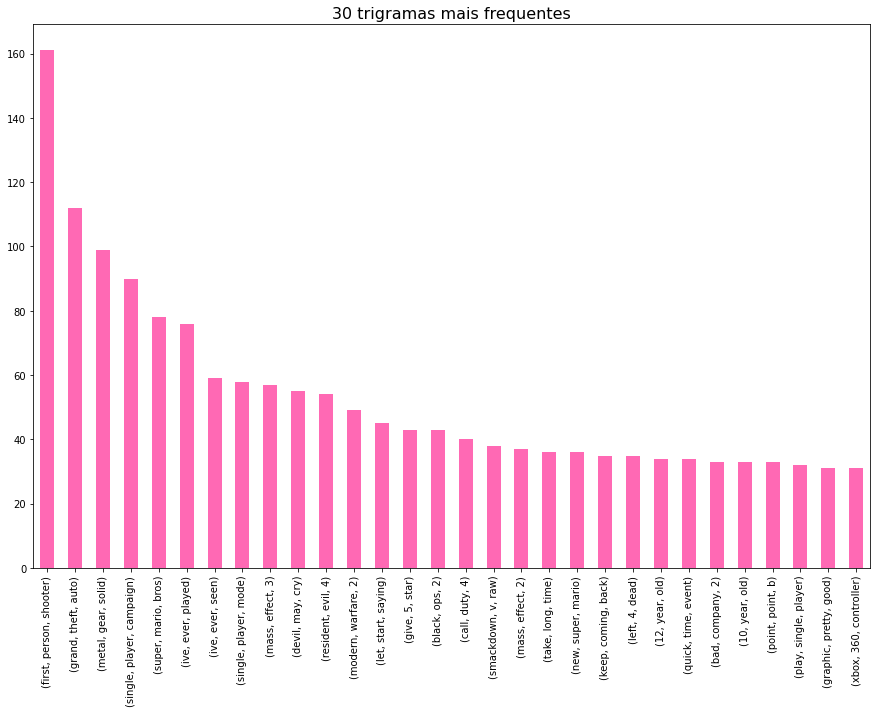

In [ ]:
trigrams_series[:30].plot.bar(figsize=(15,10), color = 'hotpink')
plt.title('30 trigramas mais frequentes', fontsize = 16)
plt.show()

Aqui, novamente, são frequentes expressões relativas aos jogos, como "first person shooter", para jogos em primeira pessoa, ou "grand theft auto", o querido GTA, ou ainda "single player campaign", para jogos solo, ou "super mario bros", que dispensa apresentações rsrs

Com essa análise, conseguimos ver quais termos costumam aparecer sempre juntinhos :) E faz total sentido, não? 

## 5.5 Análise do Tamanho

Outro ponto a se analisar é o tamanho das reviews, isto é, a quantidade de caracteres em cada review. Para isso, criaremos uma coluna no nosso dataset com tal informação e, em seguida, iremos vê-la em um gráfico:

In [ ]:
df['textSize'] = df['reviewText'].apply(len)

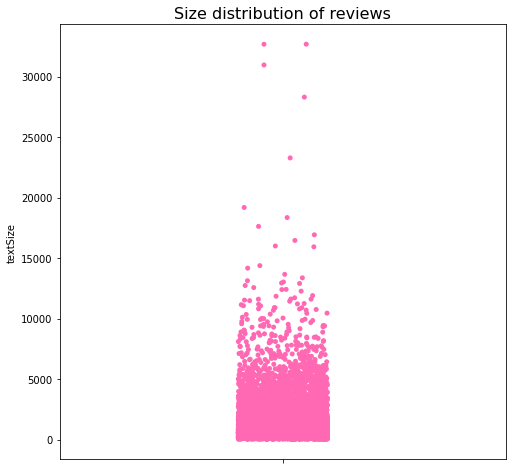

In [ ]:
plt.figure(figsize = (8,8))
sns.stripplot(y = 'textSize', data = df, color = 'hotpink')
plt.title('Tamanho das avaliações', fontsize = 16)
plt.ylabel('Tamanho do texto')
plt.show()

A maioria das reviews se concentra em um tamanho de menos de 10000 caracteres, mas sempre tem alguém fazendo textão rsrs (quem escreve uma review de 30000 caracteres ou estava MUITO feliz, ou real ficou bem irritade com o jogo kkkkk), o que atrapalha um pouco de vermos a concentração nas reviews com tamanho mais frequente. 

Para vermos a concentração do tamanho, podemos ver um boxplot:

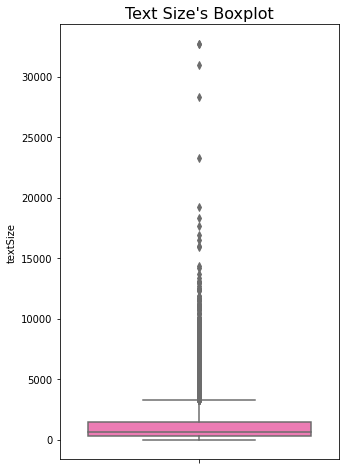

In [ ]:
plt.figure(figsize = (5,8))
sns.boxplot(y = 'textSize', data = df, color = 'hotpink')
plt.title('Boxplot do tamanho das avaliações', fontsize = 16)
plt.ylabel('Tamanho do texto')
plt.show()

Percebemos, então, que a concentração não está nem em reviews com menos de 10000 caracteres apenas, mas mais especificamente até uns 2000 caracteres. 

Podemos dar um "describe" na coluna do nosso dataset para termos alguns números que possamos analisar:

In [ ]:
df['textSize'].describe()

count    12355.000000
mean      1221.788345
std       1659.868674
min          9.000000
25%        289.000000
50%        669.000000
75%       1487.000000
max      32689.000000
Name: textSize, dtype: float64

Como vemos, a média de tamanho é, aproximadamente, 1222, mas tem algum bonito que escreveu o novo testamento com queridos 32689 caracteres. Também alguém sem vontade (olha eu aí no fim do semestre rs) escreveu algo com 9 caracteres rs, o famoso "gostei, 0 estrelas 👍".

Vamos ver um gráfico agora da distribuição de tamanho baseada na polaridade do sentimento da review:

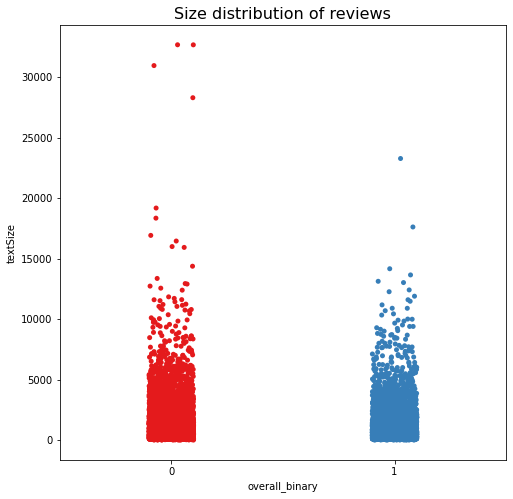

In [ ]:
plt.figure(figsize = (8,8))
sns.stripplot(x = 'overall_binary', y = 'textSize', data = df, palette = 'Set1')
plt.title('Tamanho das avaliações por polaridade', fontsize = 16)
plt.ylabel('Tamanho do texto')
plt.xlabel('Negatividade/Positividade')
plt.show()

É... não muda MUUUITA coisa assim, mas podemos perceber que os maiores textões são de quem não está tão feliz assim com o jogo rs 

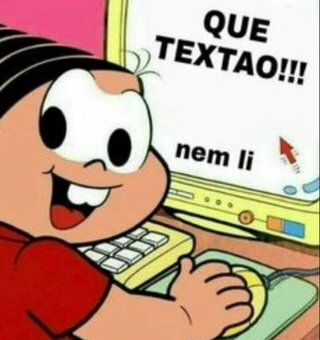

Podemos dar uma limitada no limite do nosso gráfico, para ver se conseguirmos tirar uma conclusão melhor:

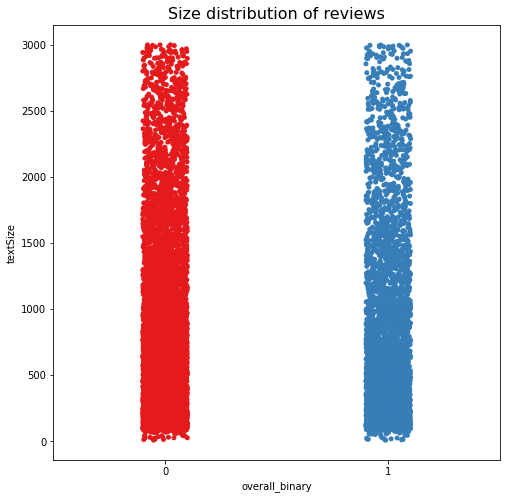

In [ ]:
plt.figure(figsize = (8,8))
sns.stripplot(x = "overall_binary", y = "textSize", data = df[df["textSize"] < 3000], palette = "Set1")
plt.title('Tamanho das avaliações por polaridade', fontsize = 16)
plt.ylabel('Tamanho do texto')
plt.xlabel('Negatividade/Positividade')
plt.show()

(kk jogo dos 7 erros)

Não mudou MUITA coisa também, mas podemos perceber que as reviews negativas apresentam uma concentração um tiquinho maior em reviews maiores. 

Podemos, por fim, plotar um boxplot dividido pelo sentimento:

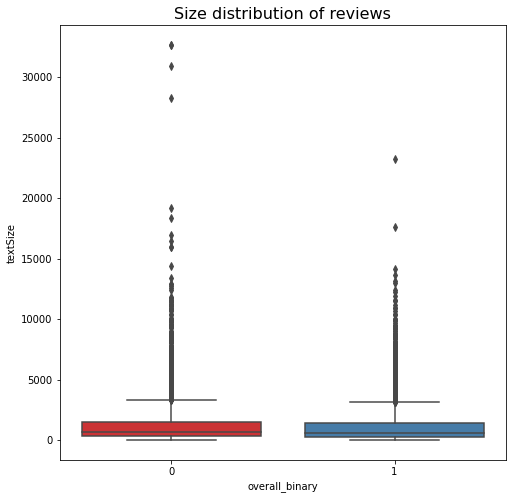

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "overall_binary", y = "textSize", data = df, palette = "Set1")
plt.title('Boxplot do tamanho das avaliações por polaridade', fontsize = 16)
plt.ylabel('Tamanho do texto')
plt.xlabel('Negatividade/Positividade')
plt.show()

A concentração do tamanho manteve-se quase igual, assim como já havíamos pontuado.

## 5.6 Entidades extraídas do texto

Uma análise que faremos, também, diz respeito às entidades extraídas do texto.

Entidades são classificadas em várias categorias, que já veremos adiante, e, baseado nessas categorias já pré-definidas (neste caso, pelo Spacy), o nosso algoritmo detecta as entidades e as classifica:

In [ ]:
entities = []

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
docs = list(nlp.pipe(df['reviewText']))

In [ ]:
for doc in docs:
  for X in doc.ents:
    entities.append((X.text, X.label_))

Vamo dar uma olhada nas primeiras para ver mais ou menos como funciona:

In [ ]:
entities[:10]

[('100000x', 'DATE'),
 ('12/9/11', 'CARDINAL'),
 ('the Federal Trade Commission', 'ORG'),
 ('consumers):A', 'ORG'),
 ('first', 'ORDINAL'),
 ('Bethesda', 'GPE'),
 ('1.2', 'CARDINAL'),
 ('WWW', 'ORG'),
 ('Bethesda', 'PERSON'),
 ('Bethesda', 'PERSON')]

Tem alguns errinhos já de cara... mas dá para entender o conceito rs 

Podemos ver quantas entidades a gente conseguiu capturar:

In [ ]:
len(entities)

100246

Capturamos 100246 entidades. 

Podemos, agora, trabalhar um pouco com elas. Primeiro vamos extrair os "labels", ou seja, as categorias que estão com as entidades, para ver quais são as mais frequentes:

In [ ]:
labels = []
for i in range(len(entities)):
  labels.append(entities[i][1])

In [ ]:
dict_labels = dict(Counter(labels)) #contando as ocorrências dos labels e colocando-os em um dicionário

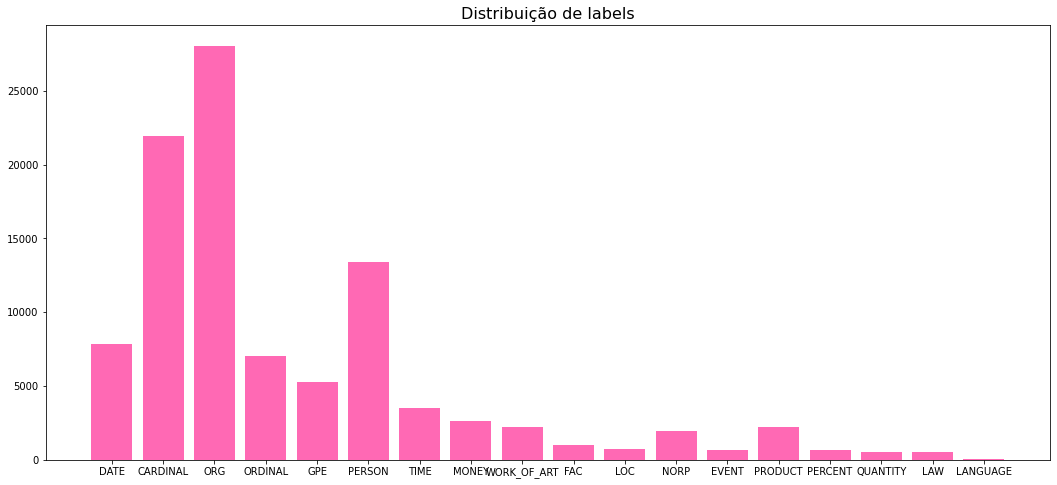

In [ ]:
plt.figure(figsize = (18,8)) 
plt.bar(dict_labels.keys(), dict_labels.values(), color = 'hotpink')
plt.title('Distribuição das etiquetas', fontsize = 16)
plt.xlabel('Etiquetas')
plt.show()

Percebemos que temos muitos números, vistos, mais significativamente em "DATE", "CARIDNAL" e "ORDINAL", mas também temos muitos nomes, como em "ORG" e "PERSON", que devem estar relacionados aos jogos.

Podemos ver, agora quais entidades ocorrem mais:

In [ ]:
items = []
for i in range(len(entities)):
  items.append(entities[i][0])

In [ ]:
Counter(items).most_common(3)

[('first', 4577), ('one', 3148), ('two', 1921)]

É, são valores numéricos que ocorrem mais frequentemente...

Podemos, então, ver quais entidades nomeadas são mais frequentes no texto. Para isso, separaremos os labels que achamos possuí-las e separaremos as entidades que ocorrem com eles:

In [ ]:
nomeadas = ['ORG', 'GPE', 'PERSON', 'WORK_OF_ART', 'FAC', 'LOC', 'NORP', 'EVENT', 'PRODUCT', 'LAW']
nomes = []
for i in range(len(entities)):
    if entities[i][1] in nomeadas:
        nomes.append(entities[i][0])

dict_nomes = dict(Counter(nomes))

In [ ]:
nomes_df = pd.DataFrame.from_dict(dict_nomes, orient = 'index').sort_values(by = 0, ascending= False)

nomes_df.head()

,0
AI,703
EA,700
RPG,609
Nintendo,591
Amazon,438


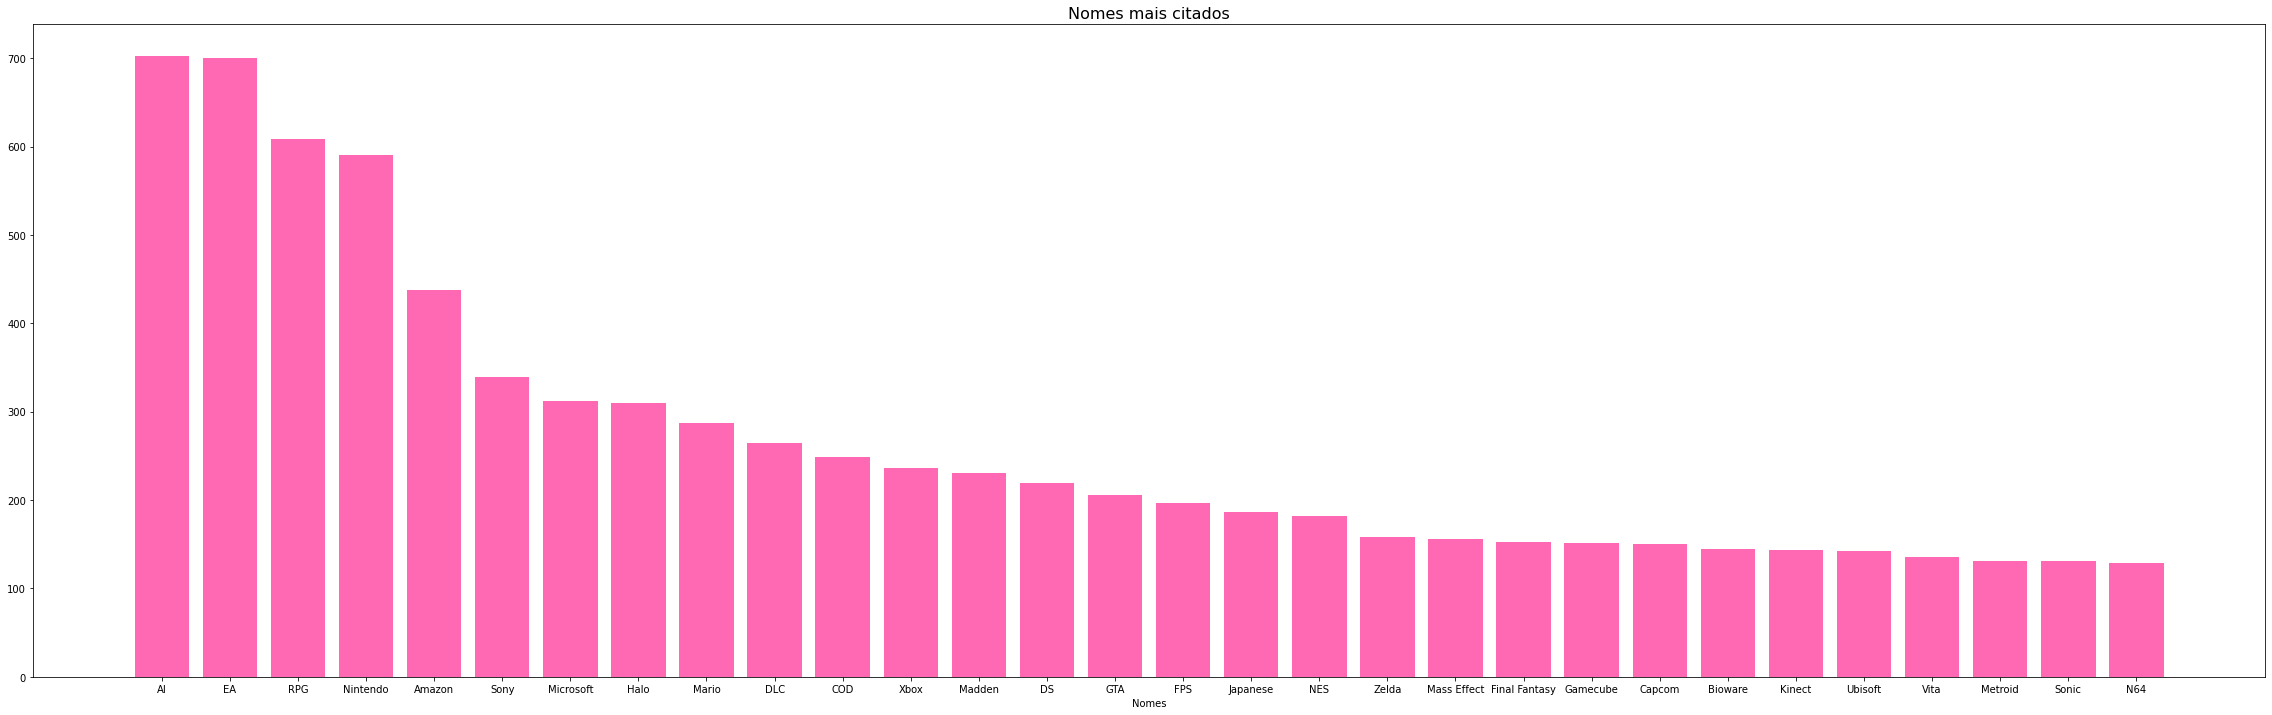

In [ ]:
plt.figure(figsize = (40, 12)) 
plt.bar(nomes_df[:30].index, nomes_df[:30][0], color = 'hotpink')
plt.title('Nomes mais citados', fontsize = 16)
plt.xlabel('Nomes')
plt.show()

Percebemos que, em primeiro lugar, chocantemente, aparece "AI". 
TURING USP, CORRE AQUI!!!!!!

Em seguida, vemos algumas entidades que dão nome mesmo como "EA", "Nintendo" e "Amazon". 

Também há, por exemplo, entidades que são abreviaturas, como "RPG" e "FPS".

## 5.7 Proporção de letras maiúsculas

Podemos, também, ver a proporção de letras maiúsculas em nosso texto. 

Para isso, veremos a proporção num contexto geral do corpus, mas também o separando por sentimento da review:

In [ ]:
def capital_proportion(df_series):
  text = ' '.join(df_series)
  letters = [i for i in text if i.isalpha()]
  capital_letters = [i for i in letters if i.isupper()]
  return len(capital_letters)*100/len(letters)

In [ ]:
porcentagens = [capital_proportion(df['reviewText']), capital_proportion(df[df['overall_binary'] == 0]['reviewText']), capital_proportion(df[df['overall_binary'] == 1]['reviewText'])]
rotulos = ['Todas as Reviews', 'Reviews Negativas', 'Reviews Positivas']

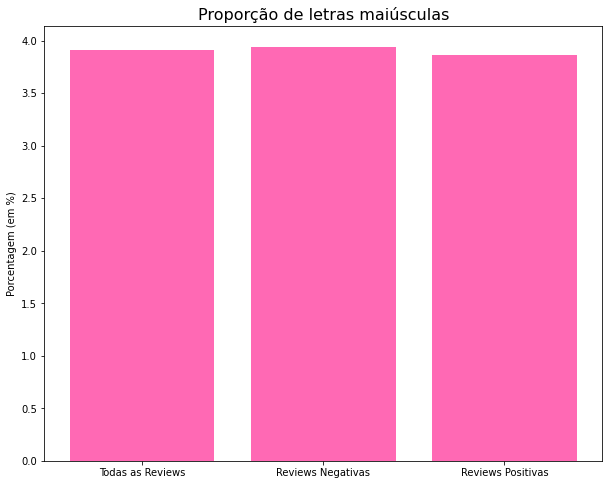

In [ ]:
plt.figure(figsize = (10,8)) 
plt.bar(rotulos, porcentagens, color = 'hotpink')
plt.title('Proporção de letras maiúsculas nas avaliações', fontsize = 16)
plt.xlabel('Polaridade da avaliação')
plt.ylabel('Porcentagem (em %)')
plt.show()

(kk jogo dos 7 erros parte 2 - remix)

Vemos que não muda MUITA coisa pras review negativas e positivas, mas quem reclama, geralmente USA UM POUQUINHO MAIS DE CAPS LOCK AAAAAAAAAAAAAA (provavelmente pra entrar mais no personagem). 

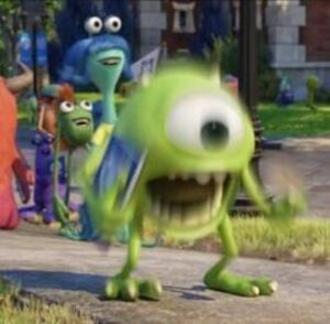

## 5.8 Classes gramaticais presentes

Outro ponto que podemos trazer para a análise diz respeito às classes gramaticais presentes.

Para isso, utilizaremos, novamente, a NLTK. Primeiramente, juntaremos o texto em uma string grandona para depois, vermos suas tags.

Veremo-nas em sua totalidade, mas também separemos em reviews boas e ruins:

In [ ]:
text = ' '.join(df['reviewText_str']).split()

In [ ]:
tagged_words = nltk.pos_tag(text)

In [ ]:
tagged_words[:10]

[('ive', 'JJ'),
 ('got', 'VBD'),
 ('play', 'JJ'),
 ('console', 'NN'),
 ('honestly', 'RB'),
 ('say', 'VBP'),
 ('look', 'VBP'),
 ('100000x', 'CD'),
 ('better', 'JJR'),
 ('ps4', 'NN')]

Como queremos só a classe gramatical, podemos separar apenas elas dessas tuplas, para, em seguida, contarmos suas ocorrências e plotá-las em um gráfico:

In [ ]:
tags = []
tags_bad = []
tags_good = []

In [ ]:
def tag(tag_list, lista):
  for i in range(len(tag_list)):
    lista.append(tag_list[i][1])

In [ ]:
tag(tagged_words, tags)

In [ ]:
counter_tags = Counter(tags) #contando a ocorrência das classes gramaticais

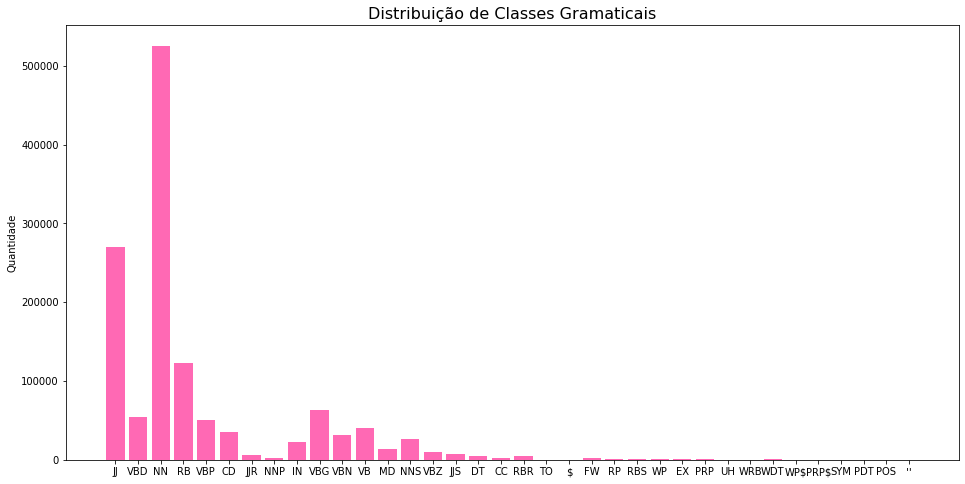

In [ ]:
plt.figure(figsize = (16,8)) 
plt.bar(counter_tags.keys(), counter_tags.values(), color = 'hotpink')
plt.title('Distribuição de classes gramaticais', fontsize = 16)
plt.xlabel('Classes gramaticais')
plt.show()

Para saber o que significa cada sigla, recomendo entrar [neste site](https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk).

Dito isso, vemos que substantivos ocorrem com mais frequência, seguidos por adjetivos e advérbios, respectivamente. 

Vale ressaltar que preposições e artigos não aparecem com grande relevância, já que fizemos tal análise baseada no texto pré-processado.

In [ ]:
text_bad = ' '.join(df[df['overall_binary'] == 0]['reviewText_str']).split()
text_good = ' '.join(df[df['overall_binary'] == 1]['reviewText_str']).split()

In [ ]:
tagged_words_bad = nltk.pos_tag(text_bad)
tagged_words_good = nltk.pos_tag(text_good)

In [ ]:
tag(tagged_words_bad, tags_bad)

In [ ]:
tag(tagged_words_good, tags_good)

In [ ]:
counter_bad = Counter(tags_bad)

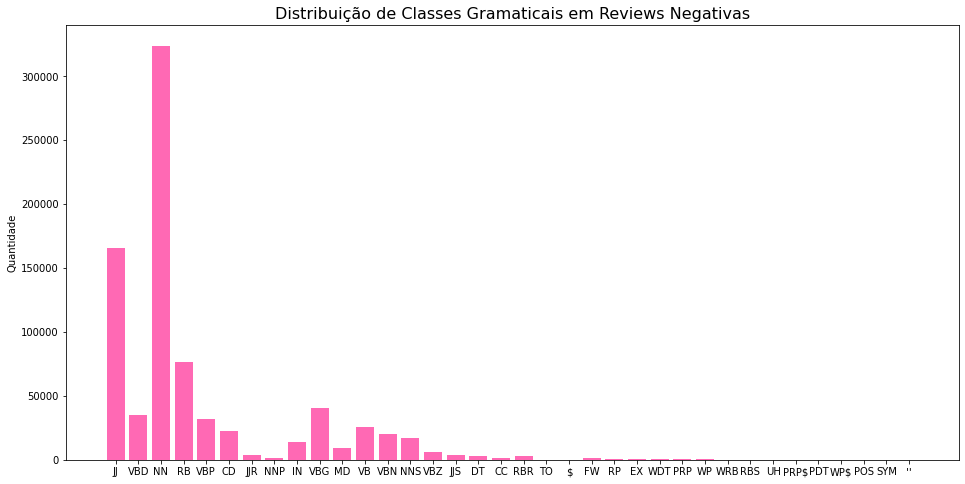

In [ ]:
plt.figure(figsize = (16,8)) 
plt.bar(counter_bad.keys(), counter_bad.values(), color = 'hotpink')
plt.title('Distribuição de classes gramaticais em avaliações negativas', fontsize = 16)
plt.xlabel('Classes gramaticais')
plt.show()

In [ ]:
counter_good = Counter(tags_good)

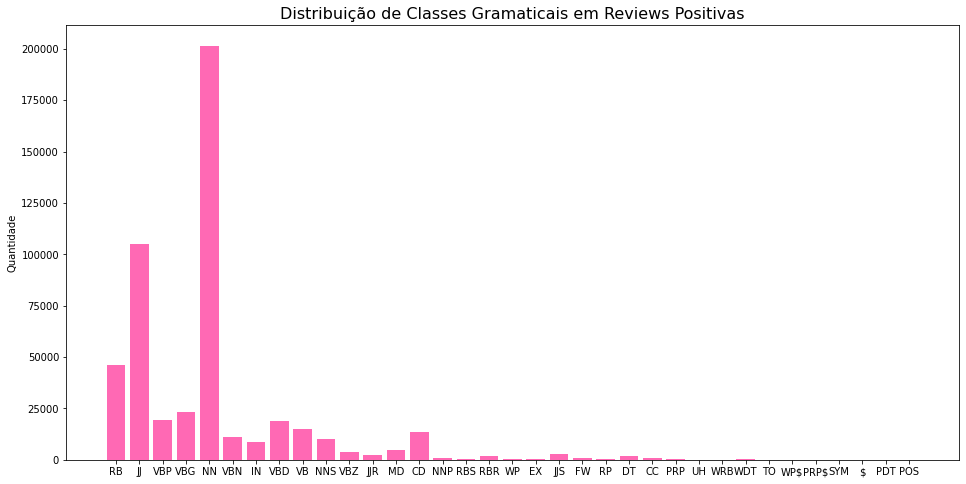

In [ ]:
plt.figure(figsize = (16,8)) 
plt.bar(counter_good.keys(), counter_good.values(), color = 'hotpink')
plt.title('Distribuição de classes gramaticais em avaliações positivas', fontsize = 16)
plt.xlabel('Classes gramaticais')
plt.show()

Percebemos que, tanto para reviews negativas, quanto para reviews positivas, há dominância de substantivos, seguidos por adjetivos e advérbios também. 

Retirando-se advérbios, verbos mais frequentes e preposições (no caso, as stopwords), isso é esperável, já que estamos falando de avaliações, e nomes e adjetivos servem para nomear e qualificar os seres, enquanto os advérbios consistentemente aumentam a intensidade e alteram as circunstâncias do discurso.

## 5.9 Outras análises

Podemos, por fim, fazer algumas análises que não necessariamente estejam intrínsecas aos textos das reviews.

Primeiramente, veremos a distribuição das reviews por ano:

In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format = '%m %d, %Y')

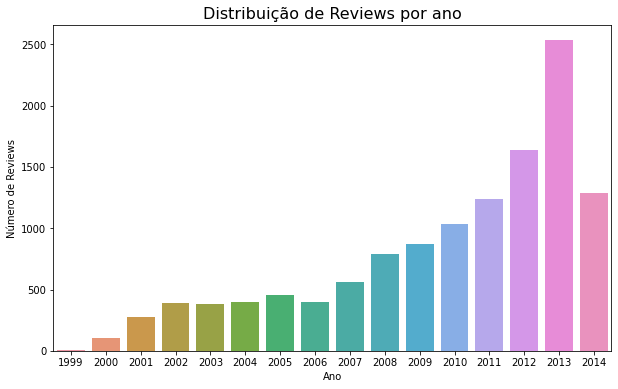

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['reviewTime'].dt.year)
plt.title("Distribuição de avaliações por ano", fontsize = 16)
plt.ylabel('Número de avaliações')
plt.xlabel("Ano")
plt.show()

Vemos que o número das reviews quase que aumentou a cada ano, só em 2003 e 2006 que caiu um pouquinho. 

Vale ressaltar que, como o dataset conta avaliações até Julho de 2014 apenas, o número de reviews deste ano não se apresenta tão grande.

A próxima análise que faremos é relativa ao número de upvotes e downvotes:

In [ ]:
df['helpful'] = df['helpful'].apply(eval)

In [ ]:
df = df.join(df['helpful'].apply(pd.Series), how = 'outer')

In [ ]:
df.head() #aqui vemos que os upvotes ficaram na feature 0, enquanto os downvotes ficaram na feature 1

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Dataset,reviewTextclean,overall_binary,reviewText_str,textSize,0,1
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,2013-11-22,train,"[ive, got, play, console, honestly, say, look,...",0,ive got play console honestly say look 100000x...,159,4,51
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,2011-11-21,train,"[give, series, word, puzzle, figure, bought, f...",0,give series word puzzle figure bought fan scra...,230,0,0
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,2013-02-11,train,"[pretty, much, already, know, reading, review,...",1,pretty much already know reading review buying...,203,0,1
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,2013-11-03,train,"[really, love, challenge, love, different, pla...",1,really love challenge love different place vis...,179,0,0
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,2011-12-02,train,"[please, read, 12911, update, article, ps3, us...",0,please read 12911 update article ps3 usersbad ...,5914,296,368


Podemos, então, ver isso em um gráfico relacionando upvotes e downvotes ao tamanho dos textos, para ver se há alguma correlação:

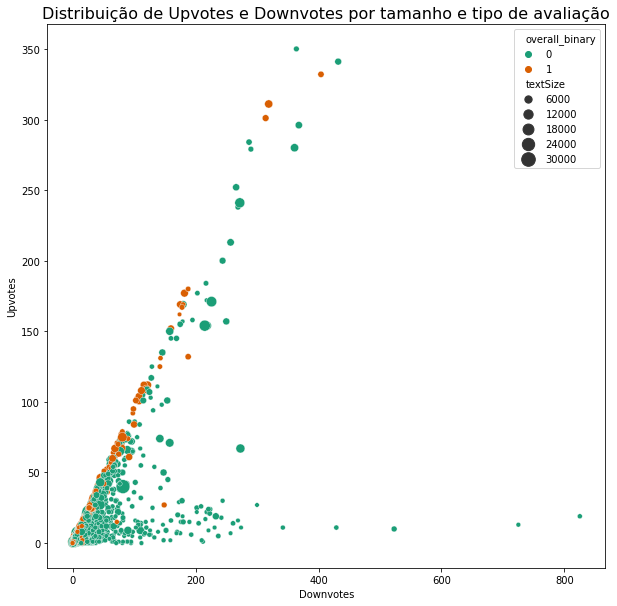

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 1, data = df[df[0] < 400], y = 0, hue = 'overall_binary', size = 'textSize', sizes = (20, 200), palette = 'Dark2')
plt.xlabel('Downvotes')
plt.ylabel('Upvotes')
plt.title('Distribuição de upvotes e downvotes por tamanho e tipo de avaliação', fontsize = 16)
plt.show()

Dei uma reduzida no escopo do gráfico, para que não fique tão ruim de se olhar. 

Percebemos que as pessoas gostam muito mais de distribuir downvotes. Quanto ao tamanho, não podemos tirar muitas conclusões. Percebemos, também, que as reviews positivas, em geral, são as que possuem mais upvotes. 

Por questão de organização, podemos dropar as colunas que criamos para fazer este gráfico:

In [ ]:
df.drop(columns = [0, 1], inplace = True)

E essa foi a nossa análise :) 

Espero que tenha dado para tirar alguns insights legais do corpus.

Agora, partiremos para a modelagem e feature engineering!

# 6. Modelagem e Feature Engineering 🧑‍🔬

Para que possamos trabalhar com o nosso texto, precisamos transformá-lo em números, para que nosso algoritmo consiga processá-lo. Para isso, utilizaremos duas estratégias aqui: Bag of Words e TFIDF. 

Se quiser entender um pouco mais dos conceitos relativos a essas técnicas, recomendo ler este artigo do [Turing Talks](https://medium.com/turing-talks/introdu%C3%A7%C3%A3o-a-bag-of-words-e-tf-idf-43a128151ce9).

## 6.1 Bag of Words

Começaremos, então, utilizando o Bag of Words:

In [ ]:
BOWvectorizer = CountVectorizer(max_features = 3000) #limitando o número máximo de features para que não fique enorme

In [ ]:
#aqui utilizaremos a coluna auxiliar que criamos lá no começo para separar os dataset e já aplicar o BOW
bow_train = BOWvectorizer.fit_transform(df[df['Dataset'] == 'train']['reviewText_str'])
bow_test = BOWvectorizer.transform(df[df['Dataset'] == 'test']['reviewText_str'])
bow_dev =  BOWvectorizer.transform(df[df['Dataset'] != 'test']['reviewText_str']) #aqui juntamos treino e validação para tunarmos os hiperparâmetros dos modelos posteriormente

In [ ]:
#aqui transformamos em dataset os BOWs
df_bow_train = pd.DataFrame(bow_train.toarray(), columns = BOWvectorizer.get_feature_names())
df_bow_test = pd.DataFrame(bow_test.toarray(), columns = BOWvectorizer.get_feature_names())
df_bow_dev = pd.DataFrame(bow_dev.toarray(), columns = BOWvectorizer.get_feature_names())

C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_bow_train.head() #dando uma olhadinha básica para ver o lindo do BOW :)

,10,100,1000,1080p,11,12,13,14,15,16,...,yes,yet,young,younger,youtube,zelda,zero,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6.2 TFIDF

Em seguida, utilizaremos o TFIDF, que possui o código bem similar ao BOW:

In [ ]:
TFIDFvectorizer = TfidfVectorizer(max_features = 3000)

In [ ]:
TFIDF_train = TFIDFvectorizer.fit_transform(df[df['Dataset'] == 'train']['reviewText_str'])
TFIDF_test = TFIDFvectorizer.transform(df[df['Dataset'] == 'test']['reviewText_str'])
TFIDF_dev =  TFIDFvectorizer.transform(df[df['Dataset'] != 'test']['reviewText_str']) 

In [ ]:
df_TFIDF_train = pd.DataFrame(TFIDF_train.toarray(), columns = TFIDFvectorizer.get_feature_names())
df_TFIDF_test = pd.DataFrame(TFIDF_test.toarray(), columns = TFIDFvectorizer.get_feature_names())
df_TFIDF_dev = pd.DataFrame(TFIDF_dev.toarray(), columns = TFIDFvectorizer.get_feature_names())

C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_TFIDF_train.head() #olhar o TFIDF também, coitado

,10,100,1000,1080p,11,12,13,14,15,16,...,yes,yet,young,younger,youtube,zelda,zero,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.073645,0.042881,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#aqui separamos a feature que queremos predizer com nossos modelos
overall_train = df[df['Dataset'] == 'train']['overall_binary']
overall_test = df[df['Dataset'] == 'test']['overall_binary']
overall_dev = df[df['Dataset'] != 'test']['overall_binary'] #ou seja, juntando treino e validação

In [ ]:
overall_train.head() #nossa feature para predizermos

0    0
1    0
2    1
3    1
4    0
Name: overall_binary, dtype: int64

## 6.3 Construção dos modelos

Agora, podemos, então, construir nossos modelos!

### 6.3.1 Definições iniciais

Vamos, primeiro, arrumar os nominhos para ficarem mais intuitivos:

In [ ]:
X_train_TFIDF = df_TFIDF_train
X_train_BOW = df_bow_train
y_train = overall_train

X_test_TFIDF = df_TFIDF_test
X_test_BOW = df_bow_test
y_test = overall_test 

Criaremos, também, listas vazias, para que possamos comparar depois as métricas. Também já criaremos a lista com todos os modelos que faremos:

In [ ]:
acuracias = []
f1score = []
precisoes = []
revocacoes = []
modelos = ['Regressão Logística_TFIDF', 'Regressão Logística_BOW', 'Random Forest_TFIDF', 'Random Forest_BOW',
            'Decision Tree_TFIDF', 'Decision Tree_BOW', 'Naive Bayes_TFIDF', 'Naive Bayes_BOW', 
            'kNN_TFIDF', 'kNN_BOW', 'SVM_TFIDF', 'SVM_BOW']

Podemos definir uma função que mostra as métricas e as adiciona às listas também:

In [ ]:
def resultados(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Acurácia: {acc} \n F1: {f1} \n Precisão: {precision} \n Recall: {recall}')

    acuracias.append(acc)
    f1score.append(f1)
    precisoes.append(precision)
    revocacoes.append(recall)

### 6.3.2 Regressão Logística

Começaremos, então, pela Regressão Logística. 

Para cada modelo, será feita tanta sua versão com BOW, como com TFIDF. 

Vou comentar as métricas depois de fitar todos os modelos :)

Acurácia: 0.7947368421052632 
 F1: 0.7227993439037725 
 Precisão: 0.772196261682243 
 Recall: 0.6793422404933196


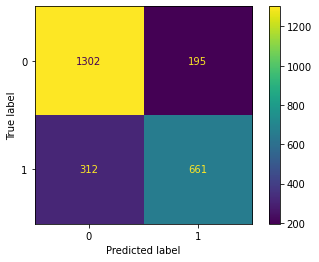

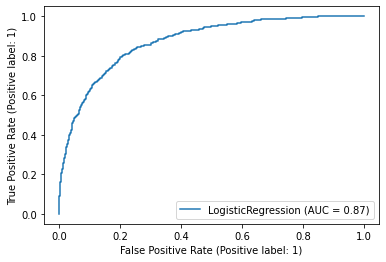

In [ ]:
model = LogisticRegression()
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_TFIDF, y_test)
RocCurveDisplay.from_estimator(model, X_test_TFIDF, y_test)

C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.7736842105263158 
 F1: 0.713773681515617 
 Precisão: 0.7112244897959183 
 Recall: 0.7163412127440905


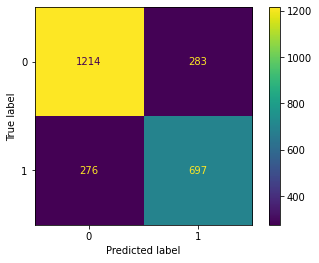

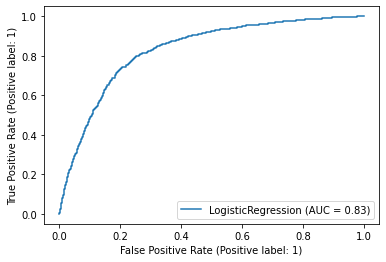

In [ ]:
model = LogisticRegression()
model.fit(X_train_BOW, y_train)
y_pred = model.predict(X_test_BOW)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_BOW, y_test)
RocCurveDisplay.from_estimator(model, X_test_BOW, y_test)

### 6.3.3 Random Forest

Agora, faremos as nossas Random Forests:

Acurácia: 0.7546558704453441 
 F1: 0.6484918793503481 
 Precisão: 0.7443408788282291 
 Recall: 0.5745118191161357


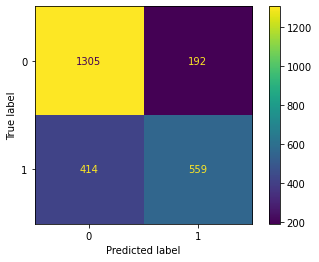

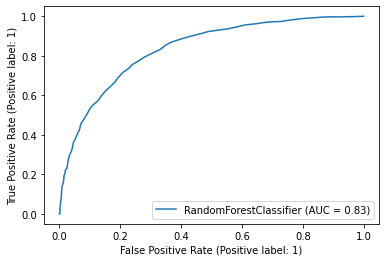

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_TFIDF, y_test)
RocCurveDisplay.from_estimator(model, X_test_TFIDF, y_test)

Acurácia: 0.7445344129554656 
 F1: 0.6205652435357787 
 Precisão: 0.7478260869565218 
 Recall: 0.5303186022610483


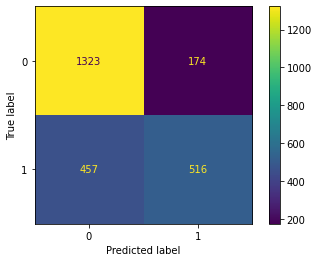

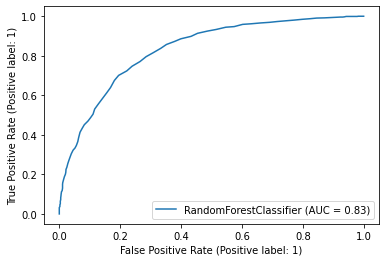

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_BOW, y_train)
y_pred = model.predict(X_test_BOW)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_BOW, y_test)
RocCurveDisplay.from_estimator(model, X_test_BOW, y_test)

### 6.3.4 Decision Tree

Em seguida, trabalharemos com as Árvores de Decisão:

Acurácia: 0.6307692307692307 
 F1: 0.5398587285570131 
 Precisão: 0.5302279484638256 
 Recall: 0.5498458376156218


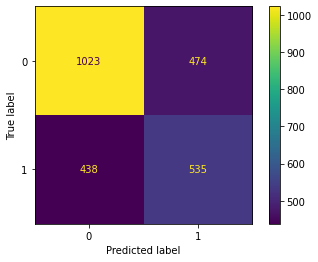

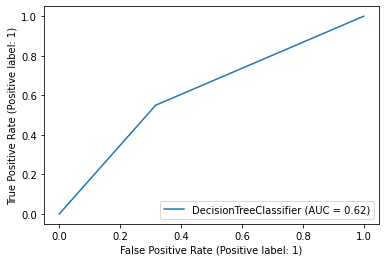

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_TFIDF, y_test)
RocCurveDisplay.from_estimator(model, X_test_TFIDF, y_test)

Acurácia: 0.6230769230769231 
 F1: 0.5342671335667835 
 Precisão: 0.52046783625731 
 Recall: 0.5488180883864338


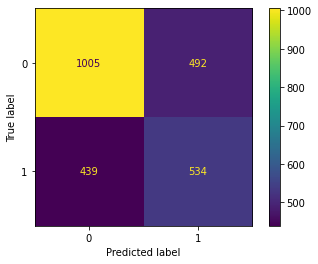

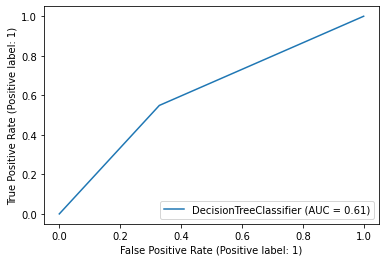

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_BOW, y_train)
y_pred = model.predict(X_test_BOW)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_BOW, y_test)
RocCurveDisplay.from_estimator(model, X_test_BOW, y_test)

### 6.3.5 Naive Bayes

Nosso querido Naive Bayes também não poderia ficar de fora:

Acurácia: 0.6870445344129554 
 F1: 0.6324298621017594 
 Precisão: 0.588495575221239 
 Recall: 0.6834532374100719


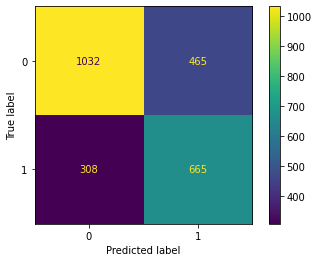

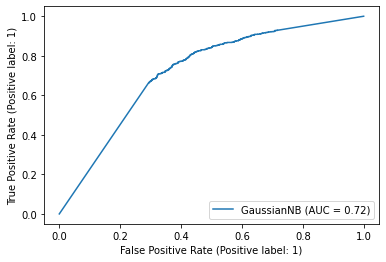

In [ ]:
model = GaussianNB()
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_TFIDF, y_test)
RocCurveDisplay.from_estimator(model, X_test_TFIDF, y_test)

Acurácia: 0.6133603238866396 
 F1: 0.6223803875049426 
 Precisão: 0.5057840616966581 
 Recall: 0.8088386433710175


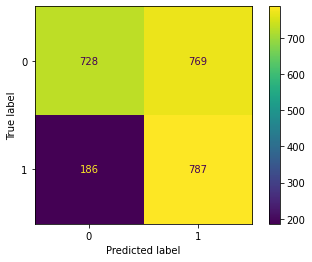

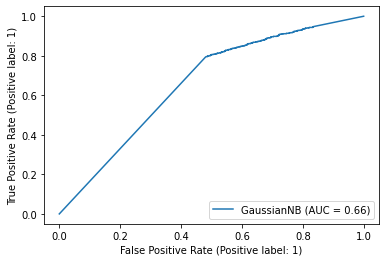

In [ ]:
model = GaussianNB()
model.fit(X_train_BOW, y_train)
y_pred = model.predict(X_test_BOW)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_BOW, y_test)
RocCurveDisplay.from_estimator(model, X_test_BOW, y_test)

### 6.3.6 kNN

Faremos também os kNNs:

Acurácia: 0.5060728744939271 
 F1: 0.5746164574616458 
 Precisão: 0.43482849604221635 
 Recall: 0.8468653648509764


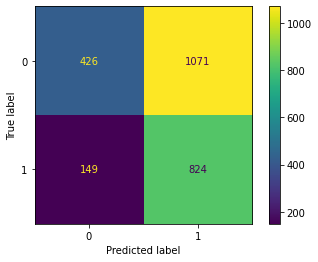

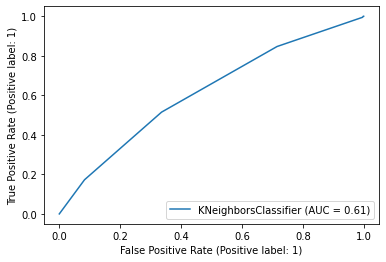

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_TFIDF, y_test)
RocCurveDisplay.from_estimator(model, X_test_TFIDF, y_test)

Acurácia: 0.5449392712550607 
 F1: 0.5716463414634146 
 Precisão: 0.4542701393095094 
 Recall: 0.7708119218910586


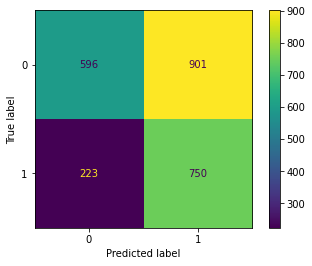

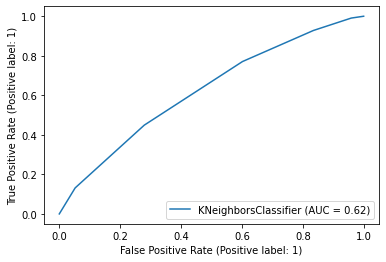

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_BOW, y_train)
y_pred = model.predict(X_test_BOW)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_BOW, y_test)
RocCurveDisplay.from_estimator(model, X_test_BOW, y_test)

### 6.3.7 SVM

Por fim, faremos os nossos SVMs:

Acurácia: 0.7923076923076923 
 F1: 0.7192118226600985 
 Precisão: 0.7693208430913349 
 Recall: 0.6752312435765673


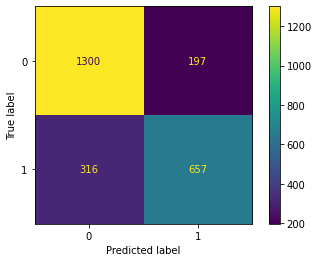

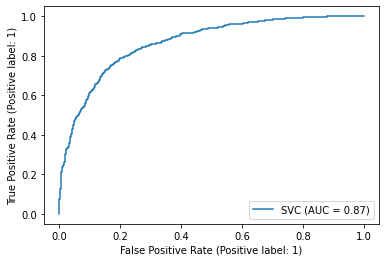

In [ ]:
model = SVC()
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_TFIDF, y_test)
RocCurveDisplay.from_estimator(model, X_test_TFIDF, y_test)

Acurácia: 0.7659919028340081 
 F1: 0.656769596199525 
 Precisão: 0.7777777777777778 
 Recall: 0.5683453237410072


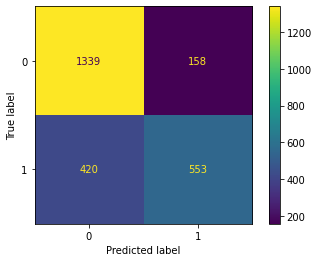

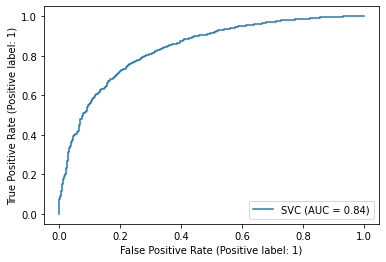

In [ ]:
model = SVC()
model.fit(X_train_BOW, y_train)
y_pred = model.predict(X_test_BOW)

resultados(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, X_test_BOW, y_test)
RocCurveDisplay.from_estimator(model, X_test_BOW, y_test)

### 6.3.8 Comparando as métricas

Agora, podemos analisar nossas métricas.

Para isso, criarei um dataset com elas, primeiramente, para, depois, colocá-lo em um gráfico:

In [ ]:
metricas = pd.DataFrame(list(zip(modelos, acuracias, f1score, precisoes, revocacoes)), columns = ['Modelo', 'Acurácia', 'F1-Score', 'Precisão', 'Recall'])

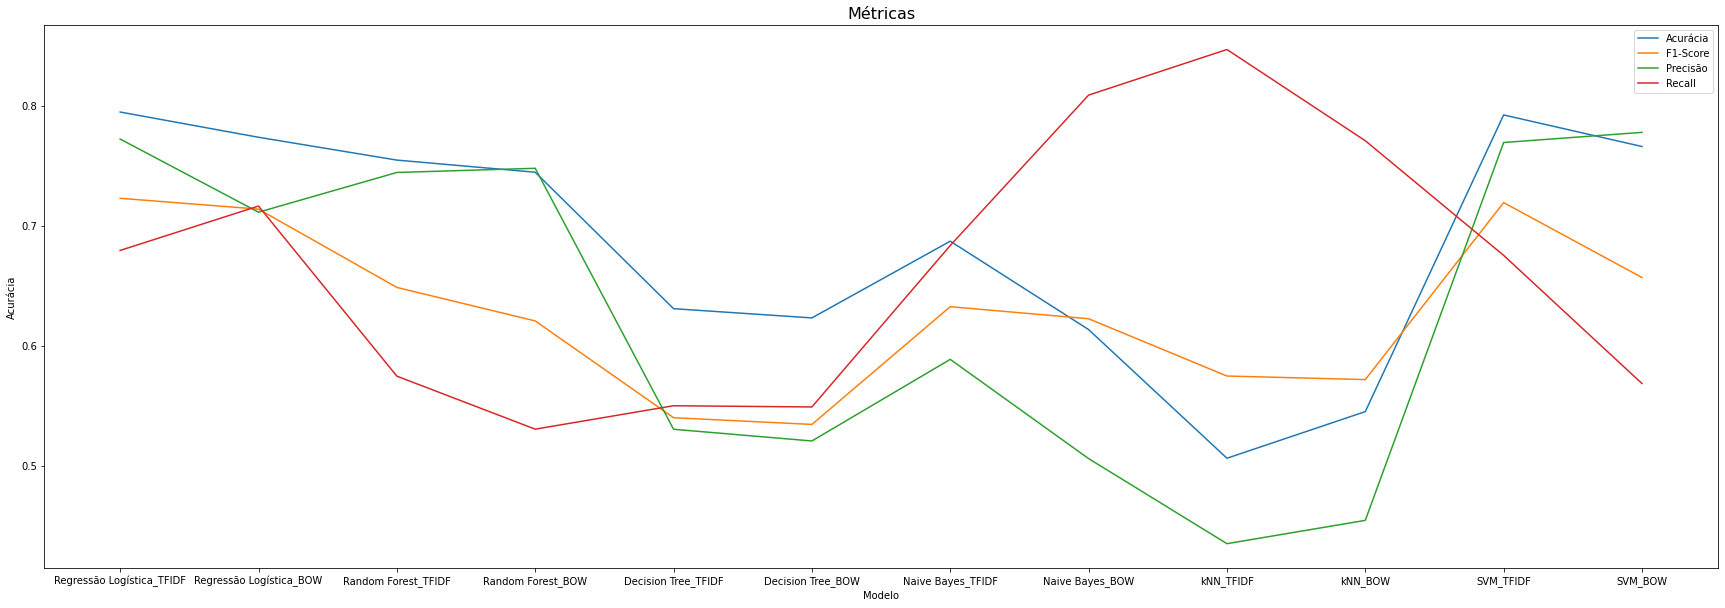

In [ ]:
plt.figure(figsize = (30, 10))
sns.lineplot(x = 'Modelo', y = 'Acurácia', data = metricas)
sns.lineplot(x = 'Modelo', y = 'F1-Score', data = metricas)
sns.lineplot(x = 'Modelo', y = 'Precisão', data = metricas)
sns.lineplot(x = 'Modelo', y = 'Recall', data = metricas)
plt.legend(labels=["Acurácia", "F1-Score", "Precisão", "Recall"])
plt.title('Métricas', fontsize = 16)
plt.show()

Bom, inicialmente vemos que os modelos que apresentaram maior acurácia, isto é, acertaram mais no total, foram a Regressão Logística com TFIDF e o SVM com TFIDF. 

No entanto, só a acurácia não é suficiente para avaliarmos nossos modelos, já que o modelo pode ter uma acurácia muito alta, mas errar muito uma determinada categoria de exemplos, o que não é adequado. 
"
A Precisão caracteriza-se pela pergunta: "de todas as reviews que o modelo predizeu que eram boas, quantas realmente eram?". Dito isso, os modelos que apresentaram maiores precisões foram também a Regressão Logística com TFIDF e SVM com TFIDF.

O Recall caracteriza-se pela pergunta: "de todas as reviews que são boas, quantas o modelo realmente predizeu como boas?". Neste caso, os modelos com maiores recalls, ou revocações, foram o kNN com TFIDF e o Naive Bayes com BOW.

No entanto, para nosso exemplo, não é mais importante se o modelo classifica corretamente um exemplo negativo ou positivo, mas sim o quanto ele acerta no total. Mesmo assim, a acurácia ainda não é a métrica mais adequada, pois ela apresenta o problema já mencionado acima. Devido a isso, utilizaremos como métrica mais importante para avaliar nossos modelos a F1 Score, que leva em conta tanto Precisão quanto Recall, já que se caracteriza por ser uma média harmônica de ambos.

Com isso em mente, os modelos que apresentaram maiores valores do F1 Score e, consequentemente, são caracterizados, aqui, como melhores, são a Regressão Logística com TFIDF e o SVM com TFIDF.

Apenas para não ignorar o kNN com TFIDF e o Naive Bayes com BOW, que apresentaram bom Recall, podemos tirar uma conclusão: como possuem Recall alto, erram pouco ao classificar reviews positivas como negativas, mas como possuem baixa Precisão, erram mais ao classificar reviews negativas como positivas. Por isso, seus F1 Scores são baixos. 

### 6.3.9 Otimizando os melhores modelos

Feito isso, podemos, agora, otimizar os melhores modelos que já temos, tunando seus hiperparâmetros: Regressão Logística com TFIDF e SVM com TFIDF :)

#### 6.3.9.1 Definições iniciais

Alteraremos, novamente, os nomes que utilizaremos, para que fiquem mais intuitivos.

In [ ]:
X_dev = df_TFIDF_dev 
y_dev = overall_dev

Também utilizaremos uma validação cruzada de 4 folds, para que o modelo consiga generalizar as predições de melhor forma.

Se quiser entender um pouquinho mais do conceito, recomendo este artigo do [Turing Talks](https://medium.com/turing-talks/turing-talks-10-introdu%C3%A7%C3%A3o-%C3%A0-predi%C3%A7%C3%A3o-a75cd61c268d) :)

In [ ]:
cv = KFold(n_splits = 4, shuffle = True, random_state = 7)

#### 6.3.9.2 Regressão Logística 

Começando pela Regressão Logística, o hiperparâmetro que podemos tunar é o C, então vamos lá:

In [ ]:
logreg_grid = {'C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
logreg_GS = GridSearchCV(LogisticRegression(), logreg_grid, cv = cv, verbose = 2, scoring = 'f1')

In [ ]:
logreg_GS.fit(X_dev, y_dev)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
[CV] END ............................................C=0.001; total time=   0.3s
[CV] END ............................................C=0.001; total time=   0.3s
[CV] END ............................................C=0.001; total time=   0.3s
[CV] END ............................................C=0.001; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.4s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ........................................

C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=100; total time=   4.6s


C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=100; total time=   4.6s


C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=100; total time=   5.2s


C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................................C=100; total time=   5.0s


C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................................C=1000; total time=   4.6s


C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................................C=1000; total time=   4.8s


C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................................C=1000; total time=   4.5s


C:\Users\rian2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................................C=1000; total time=   4.5s


GridSearchCV(cv=KFold(n_splits=4, random_state=7, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='f1', verbose=2)

In [ ]:
print(logreg_GS.best_estimator_)

LogisticRegression(C=1)


... eu fiquei imitando emojis rs

Como o C = 1 é o default para a Regressão Logística, não tem o que tunar aqui então... rs 

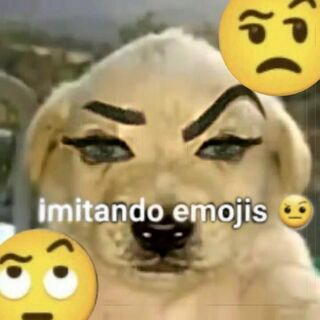

#### 6.3.9.3 SVM

Agora, tentaremos tunar o SVM, que tem os hiperparametros "C", "gamma" e "kernel":

In [ ]:
svm_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
svm_GS = GridSearchCV(SVC(), svm_grid, cv = cv, verbose = 2, scoring = 'f1')

In [ ]:
svm_GS.fit(X_dev, y_dev)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 4.9min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.2min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 4.7min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.7min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.6min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.6min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.9min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time= 1.6min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time= 1.6min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time= 1.6min
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(cv=KFold(n_splits=4, random_state=7, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=2)

É kk isso daí ficou oito horas rodando, eu realmente espero que mude algo...

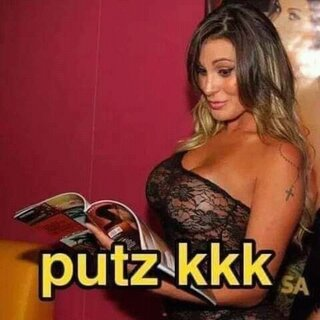

In [ ]:
print(svm_GS.best_estimator_)

SVC(C=10, gamma=1)


Ok, então podemos otimizar o modelo com esses hiperparâmetros do "C" e do "gamma".

### 6.3.10 Criando modelo otimizado

In [ ]:
model = SVC(C = 10, gamma = 1)
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

Como aqui não queremos adicionar os valores a nenhuma lista, não utilizaremos a função de métricas que fizemos, mas iremos vê-las:

Acurácia: 0.791497975708502 
 F1: 0.7273689782953943 
 Precisão: 0.75 
 Recall: 0.7060637204522097


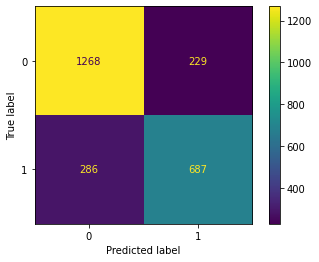

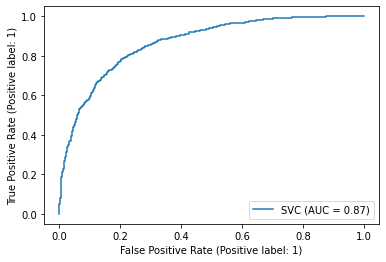

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Acurácia: {acc} \n F1: {f1} \n Precisão: {precision} \n Recall: {recall}')
ConfusionMatrixDisplay.from_estimator(model, X_test_TFIDF, y_test)
RocCurveDisplay.from_estimator(model, X_test_TFIDF, y_test)

K K K K K K K K K K K K MAIS DE OITO HORAS RODANDO E SÓ AUMENTOU 0,8% NO F1 SCORE ☠️☠️☠️

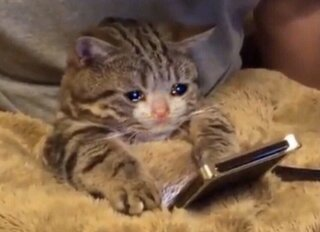

Mas fazer o quê, né? rs

Vale ressaltar que a acurácia deu uma caidinha de aproximadamente 0,1%, mas como ela não era nosso foco, tá tudo ok. A Precisão caiu 1,9%, mas o Recall aumentou significativamente, 3,1%. Isso reflete o fato de que nosso modelo classifica menos review positivas como negativas.

E essa foi a nossa parte de modelagem :)

Passei um pouco de raiva neste final, mas faz parte rs

# 7. Embeddings 📈

Agora, trabalharemos com Embeddings, ou Word Vectors, que são vetores que representam o significado de uma palavra. 

Se quiser dar uma estudadinha maior no assunto, recomendo [este artigo](https://towardsdatascience.com/how-to-solve-analogies-with-word2vec-6ebaf2354009).

## 7.1 Construindo linhas com os bigramas

Como os Embeddings trabalham com contexto, precisamos definir os bigramas do nosso texto, para que as palavras sejam entendidas próximas umas às outras:

In [ ]:
texto = [linha for linha in df['reviewTextclean']]

phrases = Phrases(texto, min_count=30)
bigram = Phraser(phrases)

reviews = bigram[texto]

## 7.2 Construindo os modelos 

Feito isso, agora podemos construir os nossos modelos com o Word2Vec.

### 7.2.1 Tentando descobrir a dimensão mais adequada

Para construírmos os modelos, um dos parâmetros que devemos levar em conta é a janela, ou window, que reflete o número de palavras no contexto que utilizaremos, no caso, 2.

Outro parâmetro importantíssimo é a dimensão do vetor que utilizaremos. Vale ressaltar que cada dimensão retrata o vetor de uma forma diferente, o que traz resultados diferentes, então iremos testar algumas para ver qual mais nos satisfaz.

Primeiramente, tentaremos um vetor de dimensão 200:

In [ ]:
w2v_model = Word2Vec(vector_size = 200, window = 2, min_count = 2, epochs = 10)
w2v_model.build_vocab(reviews)
w2v_model.train(reviews, total_examples = w2v_model.corpus_count, epochs = 20)

Para comparar os vetores, utilizaremos o método "most_similar", que indica as palavras mais parecidas à palavra indicada, e a porcentagem de quanto se parecem.

Testaremos, então, este método com as palavras "play", "good", "character" e "graphic", para, em seguida, compararmos com vetores de outras dimensões:

In [ ]:
w2v_model.wv.most_similar(positive = 'play')

[('playing', 0.6634219884872437),
 ('keep_playing', 0.5661224722862244),
 ('coop', 0.5113274455070496),
 ('played', 0.5055092573165894),
 ('prosfun', 0.48070308566093445),
 ('keep_entertained', 0.48059409856796265),
 ('replay', 0.4805441200733185),
 ('split_screen', 0.4736538231372833),
 ('multiplayer_mode', 0.47278958559036255),
 ('coopthere', 0.4679962992668152)]

In [ ]:
w2v_model.wv.most_similar(positive = 'good')

[('great', 0.6511316299438477),
 ('decent', 0.6384244561195374),
 ('pretty_good', 0.6353829503059387),
 ('bad', 0.6254075169563293),
 ('work_well', 0.541548490524292),
 ('goodthe', 0.5350139737129211),
 ('alright', 0.5347556471824646),
 ('cool', 0.5292573571205139),
 ('phenomenal', 0.5273616313934326),
 ('nice', 0.5114188194274902)]

In [ ]:
w2v_model.wv.most_similar(positive = 'character')

[('female_character', 0.6303420066833496),
 ('main_character', 0.6086298823356628),
 ('companion', 0.48370933532714844),
 ('hero', 0.46592089533805847),
 ('npc', 0.45438623428344727),
 ('personality', 0.4489515423774719),
 ('charactersthe', 0.4457480311393738),
 ('role', 0.4314148724079132),
 ('locale', 0.42222094535827637),
 ('character_development', 0.4162370562553406)]

In [ ]:
w2v_model.wv.most_similar(positive = 'graphic')

[('visuals', 0.71187424659729),
 ('graphically', 0.6186943650245667),
 ('visually', 0.5914750695228577),
 ('presentation', 0.5202429890632629),
 ('physic', 0.5177776217460632),
 ('grafics', 0.5162011384963989),
 ('today_standard', 0.5138177871704102),
 ('voiceacting', 0.5109493136405945),
 ('graphical', 0.4916914105415344),
 ('cinematics', 0.48363181948661804)]

Testaremos, agora, um vetor menor, de dimensão 80:

In [ ]:
w2v_model_2 = Word2Vec(vector_size = 80, window = 2, min_count = 2, epochs = 10)
w2v_model_2.build_vocab(reviews)
w2v_model_2.train(reviews, total_examples = w2v_model_2.corpus_count, epochs = 20)

(23489046, 25189540)

In [ ]:
w2v_model_2.wv.most_similar(positive = 'play')

[('playing', 0.6798402070999146),
 ('keep_playing', 0.5734673738479614),
 ('keep_entertained', 0.5362762212753296),
 ('split_screen', 0.5307552814483643),
 ('coop', 0.5286160707473755),
 ('compete', 0.5282353758811951),
 ('replay', 0.526038408279419),
 ('borrow', 0.5216074585914612),
 ('invite', 0.5150579810142517),
 ('prosfun', 0.5145481824874878)]

In [ ]:
w2v_model_2.wv.most_similar(positive = 'good')

[('great', 0.7516392469406128),
 ('pretty_good', 0.6784138679504395),
 ('decent', 0.658126711845398),
 ('bad', 0.6518944501876831),
 ('cool', 0.6012729406356812),
 ('excellent', 0.6007869839668274),
 ('goodthe', 0.5779474377632141),
 ('phenomenal', 0.5695106387138367),
 ('alright', 0.5650007128715515),
 ('ok', 0.561442494392395)]

In [ ]:
w2v_model_2.wv.most_similar(positive = 'character')

[('female_character', 0.640158474445343),
 ('main_character', 0.6181662082672119),
 ('npc', 0.5226345062255859),
 ('wrestler', 0.4972633123397827),
 ('personality', 0.48871713876724243),
 ('companion', 0.4831750988960266),
 ('dialog', 0.4819653332233429),
 ('squirrely', 0.4671268165111542),
 ('charactersthe', 0.46491533517837524),
 ('toon', 0.45535483956336975)]

In [ ]:
w2v_model_2.wv.most_similar(positive = 'graphic')

[('visuals', 0.7107732892036438),
 ('graphically', 0.6481583118438721),
 ('visually', 0.6244970560073853),
 ('presentation', 0.5699216723442078),
 ('voiceacting', 0.5661113262176514),
 ('physic', 0.5515789985656738),
 ('character_model', 0.5502246618270874),
 ('grafics', 0.5344255566596985),
 ('today_standard', 0.5276503562927246),
 ('texture', 0.522213339805603)]

Vemos que esses exemplos não apresentaram similaridades que não fazem sentido e, em via geral, apresentaram porcentagens maiores, ou seja, a dimensão escolhida foi melhor do que a primeira. 

Podemos testar, novamente, uma dimensão menor, desta vez, de 50:

In [ ]:
w2v_model_3 = Word2Vec(vector_size = 50, window = 2, min_count = 2, epochs = 10)
w2v_model_3.build_vocab(reviews)
w2v_model_3.train(reviews, total_examples = w2v_model_3.corpus_count, epochs = 20)

(23487431, 25189540)

In [ ]:
w2v_model_3.wv.most_similar(positive = 'play')

[('playing', 0.7566536664962769),
 ('keep_playing', 0.6561119556427002),
 ('compete', 0.6241258382797241),
 ('op', 0.6191340684890747),
 ('itmultiplayer', 0.6181573867797852),
 ('coop', 0.6071992516517639),
 ('played', 0.5999152064323425),
 ('attacksthe', 0.5875356197357178),
 ('split_screen', 0.5861139893531799),
 ('replay', 0.5819610953330994)]

In [ ]:
w2v_model_3.wv.most_similar(positive = 'good')

[('great', 0.8277873396873474),
 ('bad', 0.7469513416290283),
 ('decent', 0.7397533655166626),
 ('pretty_good', 0.7328031063079834),
 ('awesome', 0.6938841342926025),
 ('cool', 0.6511347889900208),
 ('phenomenal', 0.6316722631454468),
 ('nice', 0.6199114918708801),
 ('excellent', 0.6181104183197021),
 ('amazing', 0.6172043085098267)]

In [ ]:
w2v_model_3.wv.most_similar(positive = 'character')

[('female_character', 0.7373848557472229),
 ('main_character', 0.7257949709892273),
 ('npc', 0.585747480392456),
 ('wrestler', 0.5852558612823486),
 ('companion', 0.5743144154548645),
 ('choice', 0.5634143948554993),
 ('personality', 0.5414360761642456),
 ('establish', 0.533599853515625),
 ('role', 0.5242788791656494),
 ('dialog', 0.5215029716491699)]

In [ ]:
w2v_model_3.wv.most_similar(positive = 'graphic')

[('visuals', 0.7775125503540039),
 ('presentation', 0.7105623483657837),
 ('visually', 0.708882212638855),
 ('graphically', 0.6889974474906921),
 ('voiceacting', 0.6457504034042358),
 ('grafics', 0.6453961133956909),
 ('voice_acting', 0.6381087899208069),
 ('sound_effect', 0.6292670965194702),
 ('character_model', 0.6209498643875122),
 ('sound', 0.6117417216300964)]

Percebemos que ainda não apareceram vetores estranhos como similares e as porcentagens aumentaram, o que indica o fato dessa dimensão ser a mais adequada até então. 

Seguiremos tentando outra dimensão, neste caso, de 20:

In [ ]:
w2v_model_4 = Word2Vec(vector_size = 20, window = 2, min_count = 2, epochs = 10)
w2v_model_4.build_vocab(reviews)
w2v_model_4.train(reviews, total_examples = w2v_model_4.corpus_count, epochs = 20)

(23487174, 25189540)

In [ ]:
w2v_model_4.wv.most_similar(positive = 'play')

[('replay', 0.7817275524139404),
 ('playing', 0.7589510679244995),
 ('split_screen', 0.7465871572494507),
 ('playin', 0.7447549104690552),
 ('compete', 0.7418989539146423),
 ('played', 0.7412261366844177),
 ('enjoy', 0.7352749109268188),
 ('keep_playing', 0.7179089784622192),
 ('coop', 0.7162392139434814),
 ('borrow', 0.7141551375389099)]

In [ ]:
w2v_model_4.wv.most_similar(positive = 'good')

[('great', 0.9469109773635864),
 ('decent', 0.9025655388832092),
 ('pretty_good', 0.8862509727478027),
 ('nice', 0.8605489730834961),
 ('awesome', 0.85692298412323),
 ('okay', 0.8546798825263977),
 ('alone', 0.8470224738121033),
 ('ok', 0.8446044921875),
 ('greatbut', 0.8379389047622681),
 ('perfect', 0.8361126780509949)]

Ok, o que "alone" está fazendo aí?º

In [ ]:
w2v_model_4.wv.most_similar(positive = 'character')

[('female_character', 0.8663401007652283),
 ('choice', 0.8179514408111572),
 ('thingsthe', 0.7987146973609924),
 ('companion', 0.7791284322738647),
 ('main_character', 0.7589841485023499),
 ('appearance', 0.7469940185546875),
 ('twist', 0.7468172907829285),
 ('outfit', 0.7426339387893677),
 ('unqiue', 0.7396689653396606),
 ('refreshing', 0.7323269248008728)]

Também não vejo "twist" como tão similar a "character" '-'

In [ ]:
w2v_model_4.wv.most_similar(positive = 'graphic')

[('visuals', 0.9177433252334595),
 ('visually', 0.869931161403656),
 ('graphicsthe', 0.8445425629615784),
 ('graphically', 0.8405929803848267),
 ('voiceacting', 0.8246785402297974),
 ('today_standard', 0.8151366114616394),
 ('nothing_special', 0.8146733641624451),
 ('voice_acting', 0.8146356344223022),
 ('presentation', 0.8143303394317627),
 ('indeed', 0.8124595284461975)]

"nothing_special" e "indeed"? Real que essa dimensão foi meio lixo kk 

Enfim, era melhor ter deixado quieto kk A dimensão de 50 foi a melhor que testamos, então utilizaremos ela nas próximas células. 

Só pra lembrar que ela foi aplicada ao w2v_model_3.

### 7.2.2 Similaridade

Podemos, agora que temos o modelo, testar a similaridade entre as palavras, isto é, a porcentagem que elas se parecem:

In [ ]:
w2v_model_3.wv.similarity("gta", "san_andreas")

0.6335711

Real que san_andreas é uma versão do gta, então deveriam ser parecidos mesmo.

In [ ]:
w2v_model_3.wv.similarity("luigi", "mario")

0.6361791

Cara de um, fucinho do outro kk um é o outro, só que verde, então tá tudo ok eles serem similares. 

In [ ]:
w2v_model_3.wv.similarity("sonic", "mario")

0.5373749

Real, eu também não consigo ver muita semelhança entre eles, além de que são personagens bem conhecidos kk

MAS, podemos ver qual dos dois é mais amado (RINHA DE BONECO!!!!):

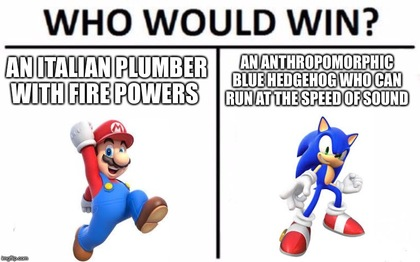

In [ ]:
w2v_model_3.wv.similarity("love", "mario")

0.14702706

Puts, coitado do Mario kk

In [ ]:
w2v_model_3.wv.similarity("love", "sonic")

0.2514076

O pobre do Sonic também não está em seus melhores dias, mas TEMOS UM VENCEDOR pelo menos kkkk

Deixando a rinha de lado, temos também o método "doesnt_match", que, dentre uma lista de opções, indica qual palavra não faz parte do conjunto. 

Vamos, primeiro, testar com alguns jogos e um intruso:

In [ ]:
w2v_model_3.wv.doesnt_match(['cod', 'gta', 'halo', 'microsoft', 'madden'])

'microsoft'

É, Gates, você ficou devendo nessa parte...

Vamos testar com algumas desenvolvedoras e outro intruso: 

In [ ]:
w2v_model_3.wv.doesnt_match(['capcom', 'marvel', 'snk', 'character'])

'character'

Essa foi fácil...

Mas a gente pode testar isso em outra rinha, pra ver qual desenvolvedora é fake rsrs:

In [ ]:
w2v_model_3.wv.doesnt_match(['capcom', 'marvel', 'snk']) 

'capcom'

Não vou negar que eu fiquei bem triste :C 

Minha fave é a SNK, mas gosto muito da Capcom também, coitada...

Vamos testar agora com alguns personagens e outro intruso:

In [ ]:
w2v_model_3.wv.doesnt_match(['mario', 'sonic', 'yoshi', 'luigi', 'fps'])

'fps'

Também foi fácil...

Mas como eu gosto de uma fofoca 💅, quero saber quem desses daqui é fake:

In [ ]:
w2v_model_3.wv.doesnt_match(['mario', 'bowser', 'yoshi', 'luigi'])

'mario'

KKKKKKKKKKKK POR ESSA EU REAL NÃO ESPERAVA

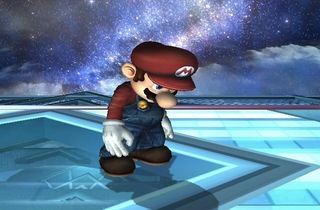

Mas fazer o quê, né? 

### 7.2.3 Analogias

Outro recurso que temos é o da analogia, que funciona assim: "se a palavra x está pra palavra y, a palavra z está para o quê?"

Então iremos utilizá-lo.

In [ ]:
def analogy(worda, wordb, wordc):
    result = w2v_model_3.wv.most_similar(negative = [worda], positive = [wordb, wordc])
    return result[0][0]

In [ ]:
analogy('mario', 'nintendo', 'sonic')

'sega'

Acertou em cheio...

In [ ]:
analogy('cod', 'fps', 'zelda')

'rpgs'

Mais um acerto...

In [ ]:
analogy('xbox', 'kinect', 'wii')

'wiimote'

Acertou novamente... É gostosinho ficar testando as coisas aqui kk

In [ ]:
analogy('mario', 'luigi', 'sonic')

'rouge'

Ok, aqui ele errou, porque os irmãos do Sonic são a Sônia e o Manic, MASSSSS e se isso for uma fofoca e a Rouge for irmã do Sonic também? 😮😮😮 Será que vem aí?

In [ ]:
analogy('love', 'hate', 'laugh')

'cringe'

Dispensa comentários esse daqui kk

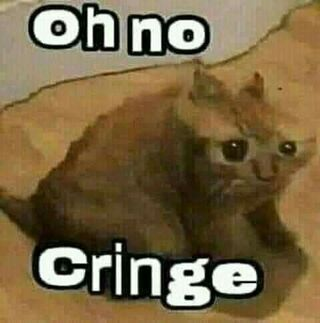

Mas foi isso a nossa brincadeirinha com os embeddings :) Juro que é super legal ficar testando as coisas recomendo que o faça. 

# 8. Conclusão 👍

O QUÊ?????? JÁ ACABOU O PROJETINHO? :C

Poxa, mas estava tão legal bater esse papo aqui.

Enfim, após tudo isso, eu percebo o quão importante é pré-processar um texto, e o quantos insights interessantes podemos tirar das análises que fazemos com o corpus! Também é importante utilizar diferentes bibliotecas em projetos futuros para que resultados possam ser comparados. Sobre a modelagem, eu quis chorar um pouco quando fui tunar os hiperparâmetros kk mas vida que segue. A minha parte favorita, de fato, foi mexer com os Word Vectors :) Foi bem divertido.

Com este projetinho, consegui ampliar meus conhecimentos acerca do Processamento de Linguagem Natural e espero ampliar mais ainda ao longo dos meus anos no Turing. 

Aproveito para agradecer a PERFEITA RAINHA MARAVILHOSA DONA DE TUDO Luisa, por ter me ajudado com minhas dúvidas! ❤️ Valeu mesmo, você é demais.

E agradeço a você também, queride leitore, por me acompanhar nesse notebook :) Espero que possamos nos falar. Um grande abraço! 

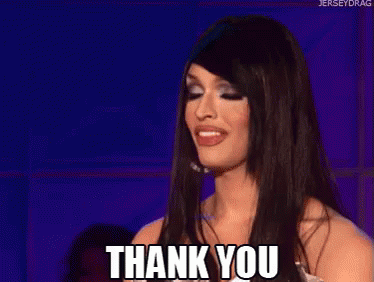